In [1]:
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import pandas as pd
cutoff_value = 0.99

from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

random.seed(0)

print("Running...")


thr_std=0.2

E = Events("CheatedRecoFile_1.root")

view_u = View(E, "u")
view_v = View(E, "v")
view_w = View(E, "w")

u_x = view_u.x
u_z = view_u.z
u_adc = view_u.adc
u_truevtx_z = view_u.true_vtx_z
u_truevtx_x = view_u.true_vtx_x

v_x = view_v.x
v_z = view_v.z
v_adc = view_v.adc
v_truevtx_z = view_v.true_vtx_z
v_truevtx_x = view_v.true_vtx_x

w_x = view_w.x
w_z = view_w.z
w_adc = view_w.adc
w_truevtx_z = view_w.true_vtx_z
w_truevtx_x = view_w.true_vtx_x

Running...


In [2]:
def AoI(plane, event_number, thresholding=True, no_std=thr_std):
    if plane=="u":
        AoI_x = u_x[event_number]
        AoI_z = u_z[event_number]
        AoI_adc = u_adc[event_number]
        AoI_truevtxz = u_truevtx_z[event_number]
        AoI_truevtxx = u_truevtx_x[event_number]
    elif plane=="v":
        AoI_x = v_x[event_number]
        AoI_z = v_z[event_number]
        AoI_adc = v_adc[event_number]
        AoI_truevtxz = v_truevtx_z[event_number]
        AoI_truevtxx = v_truevtx_x[event_number]
    elif plane=="w":
        AoI_x = w_x[event_number]
        AoI_z = w_z[event_number]
        AoI_adc = w_adc[event_number]   
        AoI_truevtxz = w_truevtx_z[event_number]
        AoI_truevtxx = w_truevtx_x[event_number]
    else:
        print("PLane not u,v,w")
        
    if thresholding:
        mean = np.average(AoI_adc)
        std = np.std(AoI_adc)
        AoI_x = AoI_x[(mean-no_std*std<AoI_adc)]
        AoI_z = AoI_z[(mean-no_std*std<AoI_adc)]
        AoI_adc = AoI_adc[(mean-no_std*std<AoI_adc)]
    
    return AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx

def find_least_z(plane, event):
    x_view, z_view, adc_view, true_z, true_x = AoI(plane, event)
    z_scores = [None] * len(x_view)
    min_z = np.amin(z_view)
    ind = np.where(min_z)[0]
    min_x = x_view[ind]
    z_diff = np.abs(true_z - min_z)
    x_diff = np.abs(true_x - min_x)
    r_diff = ((x_diff ** 2) + (z_diff ** 2))**(1/2)
    return z_diff, x_diff[0], r_diff[0]

theta_u = 0.623257100582
theta_v = -0.623257100582
theta_w = 0.

cos_u = np.cos(theta_u)
cos_v = np.cos(theta_v)
cos_w = np.cos(theta_w)
sin_u = np.sin(theta_u)
sin_v = np.sin(theta_v)
sin_w = np.sin(theta_w)

sin_dvu = np.sin(theta_v - theta_u)
sin_dwv = np.sin(theta_w - theta_v)
sin_duw = np.sin(theta_u - theta_w)

def uv_to_y(u, v):
    return ((u * cos_v - v * cos_u) / sin_dvu)

def uv_to_z(u, v):
    return ((u * sin_v - v * sin_u) / sin_dvu)

def uw_to_y(u, w):
    return ((w * cos_u - u * cos_w) / sin_duw)

def uw_to_z(u, w):
    return ((w * sin_u - u * sin_w) / sin_duw)

def vw_to_y(v, w):
    return ((v * cos_w - w * cos_v) / sin_dwv)

def vw_to_z(v, w):
    return ((v * sin_w - w * sin_v) / sin_dwv)

# 3D to wire
def yz_to_u(y, z):
    return z * cos_u - y * sin_u

def yz_to_v(y, z):
    return z * cos_v - y * sin_v

def yz_to_w(y, z):
    return z * cos_w - y * sin_w

def uv_to_yz(u, v):
    return uv_to_y(u, v), uv_to_z(u, v)

def uw_to_yz(u, w):
    return uw_to_y(u, w), uw_to_z(u, w)

def vw_to_yz(v, w):
    return vw_to_y(v, w), vw_to_z(v, w)

sample = random.sample(range(0, len(u_x)), 3000)

In [3]:
print(find_least_z("u", 14))

(207.50511, 13.201195, 207.9246)


In [43]:
def create_least_z_metrics_2D(sample):
    x_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    for i in range(len(sample)):
        z_hist_data[i], x_hist_data[i], r_hist_data[i] = find_least_z("u", sample[i])
    
    return z_hist_data, x_hist_data, r_hist_data


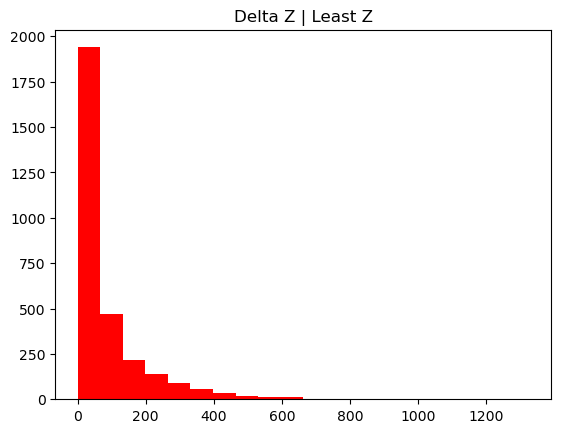

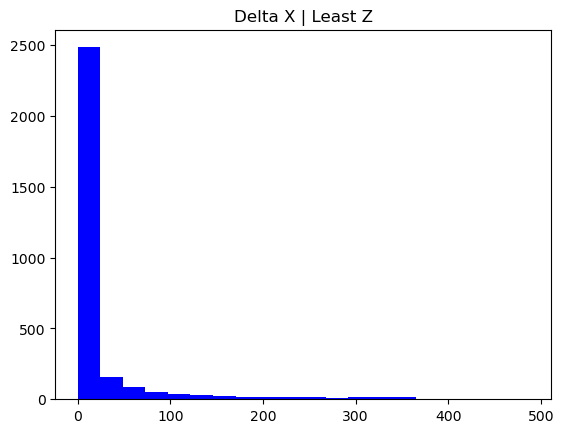

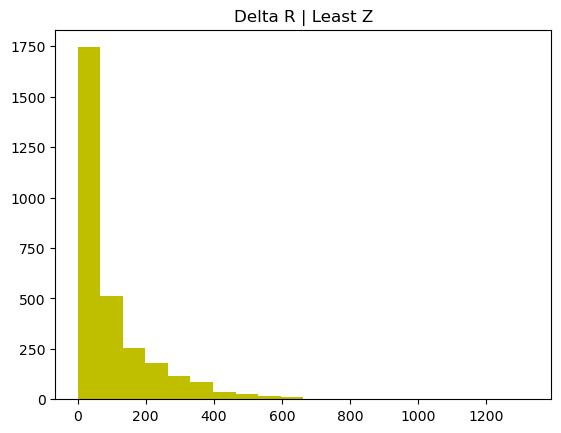

In [5]:
z_hist_data, x_hist_data, r_hist_data = create_least_z_metrics(sample)

plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | Least Z")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | Least Z")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | Least Z")
plt.show()

In [6]:

file = open('rhistdataleastz.txt','w')
for the item in r_hist_data:
file.write(item+"\n")
file.close()

SyntaxError: invalid syntax (1621106180.py, line 2)

In [4]:
def create_r68_and_50cm(hist_data):
    r68 =  np.percentile(hist_data, 68)
    fifty_cm_list = [num for num in hist_data if num > 50]
    pecentage_fifty_cm = len(fifty_cm_list) / len(hist_data)
    
    return r68, pecentage_fifty_cm


In [15]:
r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

75.71000457763674 0.4156666666666667
3.7458758544921875 0.119
98.33152160644534 0.48233333333333334


In [5]:
def rfunc(r):
    return 1/((r+0.01)**(1/2))

def rphi(plane, event_number, thresholding=True, no_std=thr_std, centre_coord=(0,0), func=rfunc, no_sectors=5, centre=0):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event_number, thresholding, no_std)
    
    centred_x = AoI_x - centre_coord[1]
    centred_z = AoI_z - centre_coord[0]
    
    cen_r = (centred_x**2 + centred_z**2)**0.5
    #distance from central point to every other point
    

    #make the problem tractable (solvable)
    
    weight = rfunc(cen_r)

    theta = np.arctan2(centred_x, centred_z)
    hist_data, hist_bins = np.histogram(theta, no_sectors, (-np.pi+centre,np.pi+centre), weights=weight)
    
    hist_sqr = hist_data**2
    score = np.sum(hist_sqr)
    norm_score = (score/len(theta)**2)**0.5
    

    return norm_score

def optimise_phi(plane, event_number, thresholding=True, no_std=thr_std, no_sectors=20, centre=0, plot=False):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event_number, thresholding, no_std)
    no_points = len(AoI_x)
    score_arr = np.zeros(no_points)
    for i in range(no_points):
        centre_co = (AoI_z[i], AoI_x[i])
        score_arr[i] = rphi(plane, event_number, centre_coord=centre_co)
    
    ind = np.argmax(score_arr)
    zmin, xmin = AoI_z[ind], AoI_x[ind]
    if plot:
        plotter(plane, event_number, thresholding, no_std)
        plt.plot(zmin, xmin, 'ro')
        plt.show()
    return zmin, xmin, score_arr[ind], score_arr

def rphi_accuracy(plane, sample, thresholding=True, no_std=thr_std):
    Zvert = [None] * len(sample)
    Zvert_true = [None] * len(sample)
    Xvert = [None] * len(sample)
    Xvert_true = [None] * len(sample) 
    for i in tqdm(range(len(sample))):   
        AoI_x, AoI_z, AoI_adc, Zvert_true_place, Xvert_true_place = AoI(plane, sample[i], thresholding, no_std)
        Zvert_place, Xvert_place = optimise_phi(plane, sample[i])[0], optimise_phi(plane, sample[i])[1]
        Zvert[i] = Zvert_place
        Xvert[i] = Xvert_place
        Zvert_true[i] = Zvert_true_place
        Xvert_true[i] = Xvert_true_place
    
    z_hist_data = np.abs(np.array(Zvert_true) - np.array(Zvert))
    x_hist_data = np.abs(np.array(Xvert_true) - np.array(Xvert))
    r_hist_data = (z_hist_data**2 + x_hist_data**2)**(1/2)


    return z_hist_data, x_hist_data, r_hist_data

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [09:47<00:00,  5.11it/s]


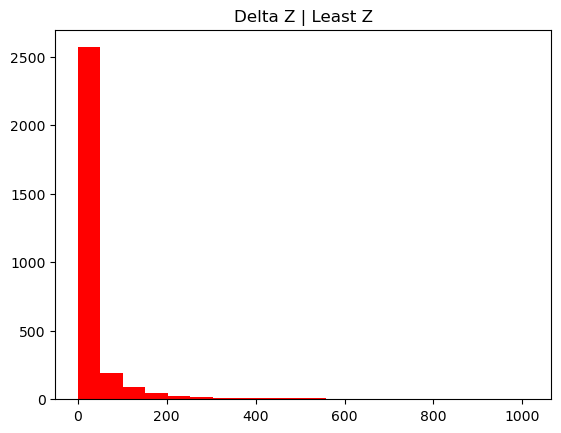

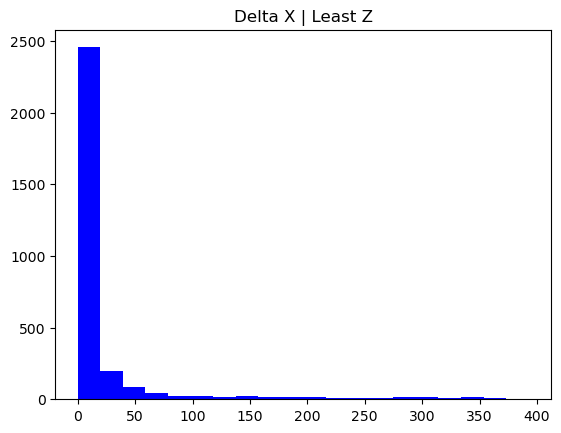

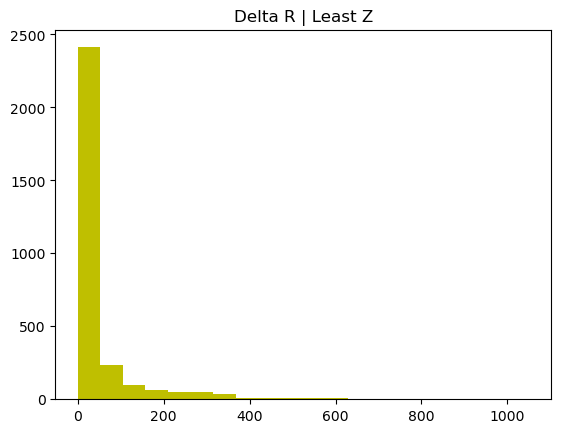

In [22]:
z_hist_data, x_hist_data, r_hist_data = rphi_accuracy("u", sample)

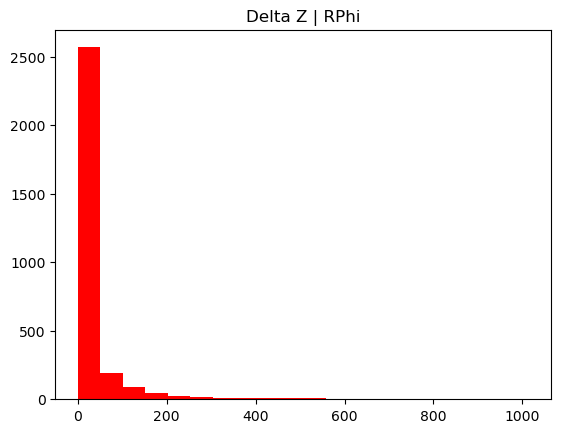

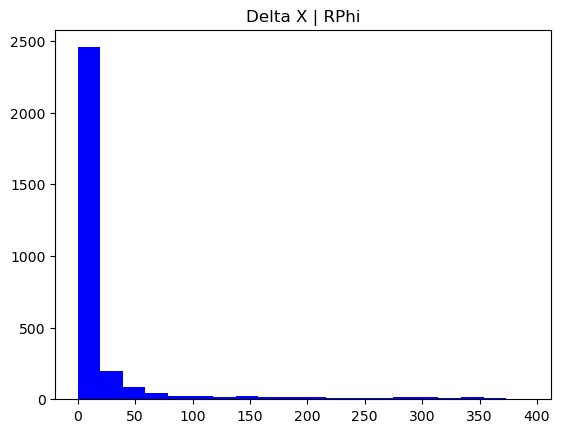

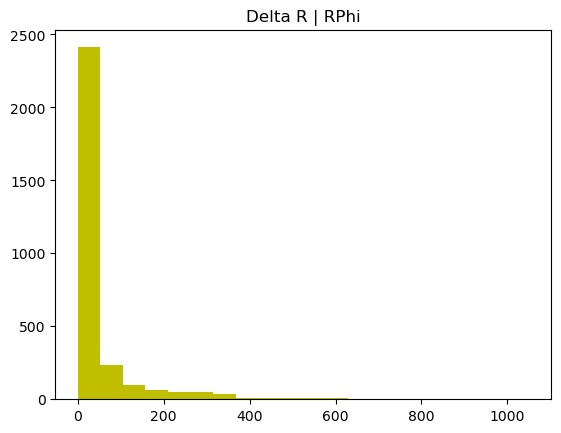

24.028677978515628 0.14733333333333334
7.8764736938476565 0.09766666666666667
30.155181503295903 0.20266666666666666


In [24]:
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | RPhi")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | RPhi")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | RPhi")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [6]:
def find_least_z_3D(plane, event):
    x_view, z_view, adc_view, true_z, true_x = AoI(plane, event)
    z_scores = [None] * len(x_view)
    min_z = np.amin(z_view)
    ind = np.where(min_z)[0]
    min_x = x_view[ind]
    return min_z, min_x, true_z, true_x

def create_least_z_metrics(sample):
    x_hist_data = [None] * len(sample)
    y_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    for i in range(len(sample)):
        min_zu, min_xu, true_zu, true_xu = find_least_z_3D("u", sample[i])
        min_zv, min_xv, true_zv, true_xv = find_least_z_3D("v", sample[i])
        min_zw, min_xw, true_zw, true_xw = find_least_z_3D("w", sample[i])
        x_diff = np.abs(((min_xu + min_xv + min_xw) / 3) - ((true_xu + true_xv + true_xw) / 3))

        yuv, zuv = uv_to_yz(min_zu, min_zv)
        yuw, zuw = uw_to_yz(min_zu, min_zw)
        yvw, zvw = vw_to_yz(min_zv, min_zw)
        
        yuv_true, zuv_true = uv_to_yz(true_zu, true_zv)
        yuw_true, zuw_true = uw_to_yz(true_zu, true_zw)
        yvw_true, zvw_true = vw_to_yz(true_zv, true_zw)
        
        y_diff = np.abs(((yuv + yuw + yvw) / 3) - ((yuv_true + yuw_true + yvw_true) / 3))
        z_diff = np.abs(((zuv + zuw + zvw) / 3) - ((zuv_true + zuw_true + zvw_true) / 3))
        
        r_diff = (x_diff[0] ** 2 + y_diff ** 2 + z_diff ** 2)**(1/2)
        
        x_hist_data[i], y_hist_data[i], z_hist_data[i], r_hist_data[i] = x_diff[0], y_diff, z_diff, r_diff
    
    return z_hist_data, y_hist_data, x_hist_data, r_hist_data

In [36]:
z_hist_data, y_hist_data, x_hist_data, r_hist_data = create_least_z_metrics(sample)

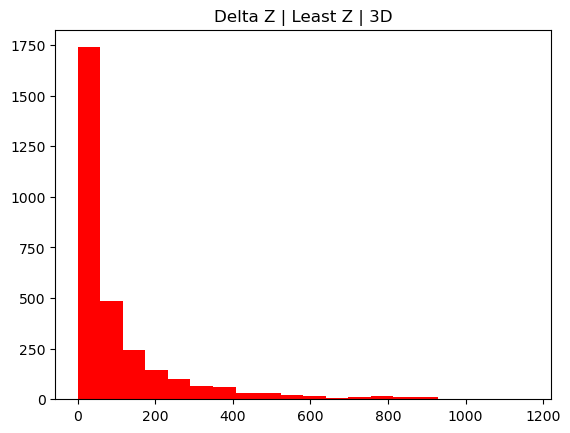

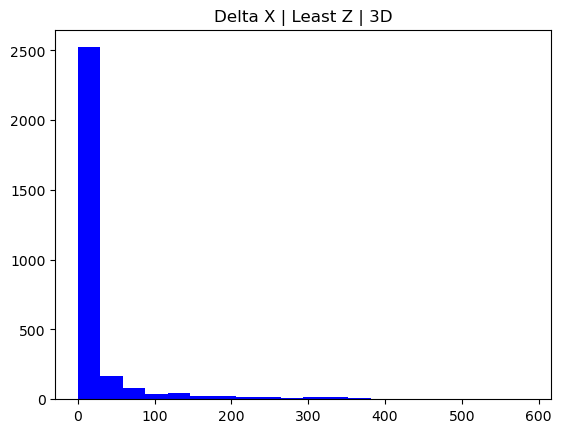

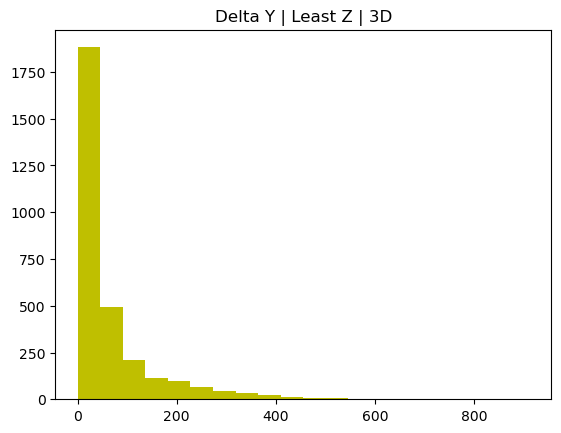

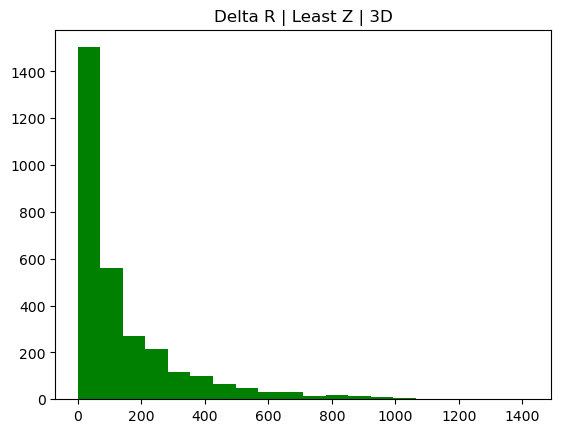

90.04252350978473 0.455
56.32674802207479 0.35333333333333333
3.6143261718750113 0.11766666666666667
137.73712132945903 0.5816666666666667


In [39]:
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | Least Z | 3D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | Least Z | 3D")
plt.show()

plt.clf()
x = plt.hist(y_hist_data, 20, color='y')
title = plt.title("Delta Y | Least Z | 3D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='g')
title = plt.title("Delta R | Least Z | 3D")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68Y, pecentage_fifty_cmY = create_r68_and_50cm(y_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68Y, pecentage_fifty_cmY)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [11]:
def rphi_accuracy_3D(sample, thresholding=True, no_std=thr_std):
    x_hist_data = [None] * len(sample)
    y_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    
    for i in tqdm(range(len(sample))):   
        AoI_xu, AoI_zu, AoI_adcu, Zvert_true_placeu, Xvert_true_placeu = AoI("u", sample[i], thresholding, no_std)
        Zvert_placeu, Xvert_placeu = optimise_phi("u", sample[i])[0], optimise_phi("u", sample[i])[1]
        AoI_xv, AoI_zv, AoI_adcv, Zvert_true_placev, Xvert_true_placev = AoI("v", sample[i], thresholding, no_std)
        Zvert_placev, Xvert_placev = optimise_phi("v", sample[i])[0], optimise_phi("v", sample[i])[1]
        AoI_xw, AoI_zw, AoI_adcw, Zvert_true_placew, Xvert_true_placew = AoI("w", sample[i], thresholding, no_std)
        Zvert_placew, Xvert_placew = optimise_phi("w", sample[i])[0], optimise_phi("w", sample[i])[1]
        
        x_diff = np.abs(((Xvert_placeu + Xvert_placev + Xvert_placew) / 3) - ((Xvert_true_placeu + Xvert_true_placev + Xvert_true_placew) / 3))
        
        yuv, zuv = uv_to_yz(Zvert_placeu, Zvert_placev)
        yuw, zuw = uw_to_yz(Zvert_placeu, Zvert_placew)
        yvw, zvw = vw_to_yz(Zvert_placev, Zvert_placew)
        
        yuv_true, zuv_true = uv_to_yz(Zvert_true_placeu, Zvert_true_placev)
        yuw_true, zuw_true = uw_to_yz(Zvert_true_placeu, Zvert_true_placew)
        yvw_true, zvw_true = vw_to_yz(Zvert_true_placev, Zvert_true_placew)
        
        y_diff = np.abs(((yuv + yuw + yvw) / 3) - ((yuv_true + yuw_true + yvw_true) / 3))
        z_diff = np.abs(((zuv + zuw + zvw) / 3) - ((zuv_true + zuw_true + zvw_true) / 3))
        
        r_diff = (x_diff ** 2 + y_diff ** 2 + z_diff ** 2)**(1/2)
        
        x_hist_data[i], y_hist_data[i], z_hist_data[i], r_hist_data[i] = x_diff, y_diff, z_diff, r_diff


    return z_hist_data, y_hist_data, x_hist_data, r_hist_data

In [45]:
z_hist_data, y_hist_data, x_hist_data, r_hist_data = rphi_accuracy_3D(sample)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [34:30<00:00,  1.45it/s]


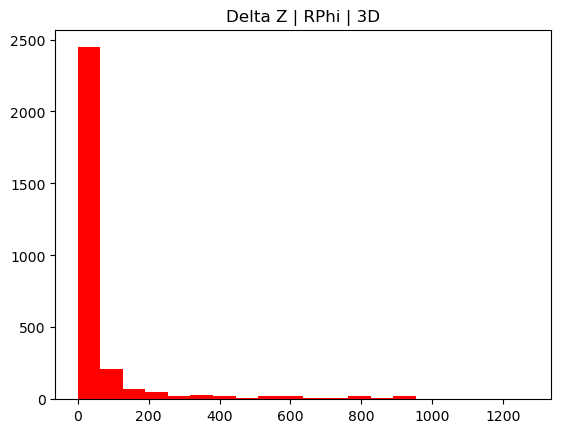

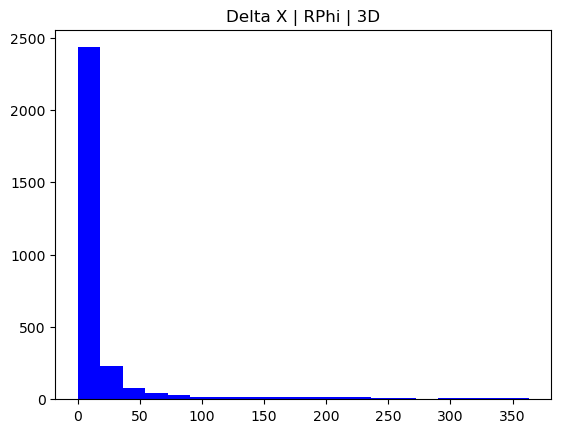

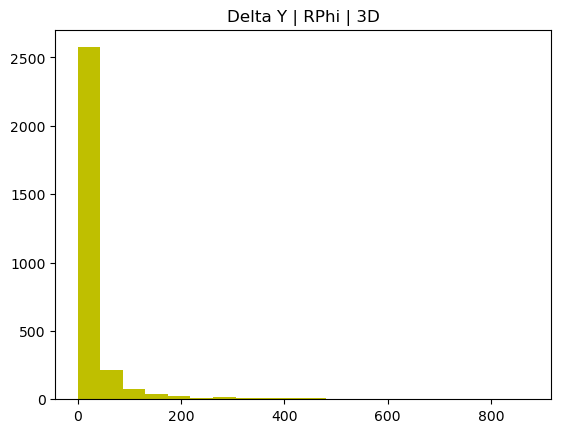

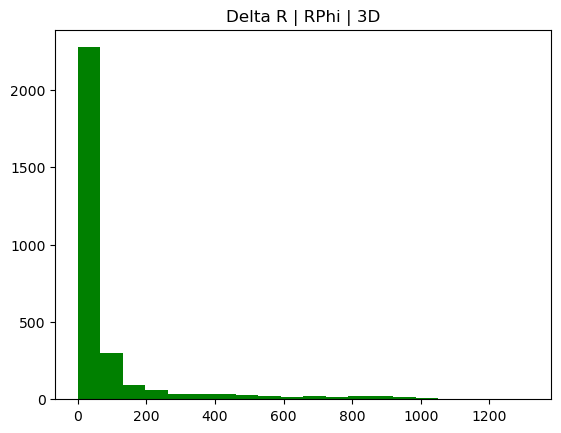

34.90936580738312 0.22866666666666666
16.812726618557424 0.124
7.871770222981783 0.092
46.921103275159325 0.30766666666666664


In [46]:
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | RPhi | 3D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | RPhi | 3D")
plt.show()

plt.clf()
x = plt.hist(y_hist_data, 20, color='y')
title = plt.title("Delta Y | RPhi | 3D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='g')
title = plt.title("Delta R | RPhi | 3D")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68Y, pecentage_fifty_cmY = create_r68_and_50cm(y_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68Y, pecentage_fifty_cmY)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [7]:
def line_finder(point1, point2):
    slope = (point1[1] - point2[1])/(point1[0] - point2[0])
    intercept = point1[1] - slope * point1[0]
    return slope, intercept

def line_intersect(slope1, intercept1, slope2, intercept2):
    x_point = (intercept2 - intercept1)/(slope1 - slope2)
    z_point = slope1 * x_point + intercept1
    return x_point, z_point

def check_valid_intersection(point1, point2, point3, point4, range_x, range_z):
    slope1, intercept1 = line_finder(point1, point2)
    slope2, intercept2 = line_finder(point3, point4)
    x_point, z_point = line_intersect(slope1, intercept1, slope2, intercept2)
    x_vertices = [point1[0], point2[0], point3[0], point4[0]]
    z_vertices = [point1[1], point2[1], point3[1], point4[1]]
    x_max, x_min = max(x_vertices), min(x_vertices)
    z_max, z_min = max(z_vertices), min(z_vertices)
    angle1, angle2 = np.arctan(slope1), np.arctan(slope2)
    if x_point > x_min and x_point < x_max:
        if z_point > z_min and z_point < z_max:
            if angle1 < 0.8*angle2 or angle1 > 1.25*angle2: 
                return x_point, z_point
            else:
                return "fail 1", angle1, angle2
        else:
            return "fail 2"
    else:
        return "fail 3"

def get_valid_points(point1, point2, point3, point4, range_x, range_z):
    initial_vertices = [0, 0]
    try:
        initial_vertices[0], initial_vertices[1] = check_valid_intersection(point1, point2, point3, point4, range_x, range_z)
        #print("V1")
        return initial_vertices
    except:
        try:
            initial_vertices[0], initial_vertices[1] = check_valid_intersection(point1, point3, point2, point4, range_x, range_z)
            #print("V2")
            return initial_vertices
        except:
            try:
                initial_vertices[0], initial_vertices[1] = check_valid_intersection(point1, point4, point2, point3, range_x, range_z)
                #print("V3")
                return initial_vertices
            except:
                #print("Fail", point1, point2, point3, point4) 
                return False

def select_random_points(AoI_x, AoI_z, AoI_adc, iterations="scaled", no_std=thr_std):
    if iterations == "scaled":
        iterations = int((len(AoI_x))*4)
        initial_vertex_points = np.zeros((iterations, 2))
        vertex_length = len(AoI_x)
        if vertex_length > 4:
            range_x = (np.amin(AoI_x), np.amax(AoI_x))
            range_z = (np.amin(AoI_z), np.amax(AoI_z))
            for i in range(iterations):
                sample = random.sample(range(0, vertex_length), 4)
                vtxind_1, vtxind_2, vtxind_3, vtxind_4 = sample[0], sample[1], sample[2], sample[3]
                point1, point2, point3, point4 = (AoI_x[vtxind_1], AoI_z[vtxind_1]), (AoI_x[vtxind_2], AoI_z[vtxind_2]), (AoI_x[vtxind_3], AoI_z[vtxind_3]), (AoI_x[vtxind_4], AoI_z[vtxind_4])
                try:
                    initial_vertex_points[i, 0], initial_vertex_points[i, 1] = get_valid_points(point1, point2, point3, point4, range_x, range_z)
                except:
                    pass
                '''
                print("Sample: ", sample)
                print("Slope 1: ", slope1)
                print("Slope 2: ", slope2)
                print("Intercept 1: ", intercept1)
                print("Intercept 2: ", intercept2)
                print("$$$$$$$$    X-point, Z-point    $$$$$$$$: ", x_point, y_point)
                '''
    else:
        initial_vertex_points = np.zeros((iterations, 2))
        vertex_length = len(AoI_x)
        if vertex_length > 4:
            range_x = (np.amin(AoI_x), np.amax(AoI_x))
            range_z = (np.amin(AoI_z), np.amax(AoI_z))
            for i in range(iterations):
                sample = random.sample(range(0, vertex_length), 4)
                vtxind_1, vtxind_2, vtxind_3, vtxind_4 = sample[0], sample[1], sample[2], sample[3]
                point1, point2, point3, point4 = (AoI_x[vtxind_1], AoI_z[vtxind_1]), (AoI_x[vtxind_2], AoI_z[vtxind_2]), (AoI_x[vtxind_3], AoI_z[vtxind_3]), (AoI_x[vtxind_4], AoI_z[vtxind_4])
                try:
                    initial_vertex_points[i, 0], initial_vertex_points[i, 1] = get_valid_points(point1, point2, point3, point4, range_x, range_z)
                except:
                    pass
    return initial_vertex_points

def heatmap4points(plane, event_number, thresholding=False, no_std=thr_std, iterations=10000, bins=100):
    
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event_number, thresholding, no_std)
    vertex_points = select_random_points(AoI_x, AoI_z, AoI_adc, iterations)
    vertex_points = vertex_points[~np.all(vertex_points == 0, axis=1)] #removes all the 0,0 vertices
    
    
    histvertex = plt.hist2d(vertex_points[:,1], vertex_points[:,0], bins=(bins, bins), cmap=plt.cm.jet)
    plt.title(str(plane) + str(event_number))
    plt.close()
    histogram_array = histvertex[0]
    max_value = np.amax(histogram_array)
    indices = np.where(histogram_array == max_value)
    z_value = histvertex[1][indices[0]]
    x_value = histvertex[2][indices[1]]

    return z_value[0], x_value[0], histogram_array, histvertex[1], histvertex[2]

def quadvertex_scores(plane, event_number, binwidth=(100,100), binradius=3):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, event_number)
    
    h, zedges, xedges = heatmap4points(plane, event_number)[2], heatmap4points(plane, event_number)[3], heatmap4points(plane, event_number)[4]

    zbins = np.digitize(AoI_z, zedges) - 2 
    xbins = np.digitize(AoI_x, xedges) - 2
    
    zxbins = np.concatenate((zbins[...,None],xbins[...,None]), axis=1) 
    
    weights = h[zxbins[:,0], zxbins[:,1]]
    
    scores = weights/np.amax(weights)
    return scores

def create_quadvertex_metrics_2D(plane, sample):
    x_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    for i in tqdm(range(len(sample))):
        AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI(plane, sample[i])
        scores = quadvertex_scores(plane, sample[i])
        max_score = np.amax(scores)
        ind = np.where(max_score)[0]
        x_pos, z_pos = AoI_x[ind], AoI_z[ind]
        
        x_diff = np.abs(x_pos - AoI_truevtxx)
        z_diff = np.abs(z_pos - AoI_truevtxz)
        r_diff = (x_diff ** 2 + z_diff ** 2) ** (1/2)
        
        z_hist_data[i], x_hist_data[i], r_hist_data[i] = z_diff[0], x_diff[0], r_diff[0]
    
    return z_hist_data, x_hist_data, r_hist_data

In [8]:
def findfourpointpdf(plane, events, plot=True):
    
    total_signal = []
    total_back = []
    total_r_sig = []
    total_r_back = []
    
    for ev in tqdm(events):
        signal = []
        back = []
        AoI_x, AoI_z, AoI_adc, Zvert_true_place, Xvert_true_place = AoI(plane, ev)
        
        normalised_score = quadvertex_scores(plane, ev)
    
        r = [None] * len(AoI_z)

        for i in range(len(normalised_score)):
            
            r[i] = ( (AoI_z[i]-Zvert_true_place)**2 + (AoI_x[i]-Xvert_true_place)**2 )**0.5
            if r[i] < 4:
                signal.append(normalised_score[i])
            else:
                back.append(normalised_score[i])
                
        total_signal.extend(signal)
        total_back.extend(back)
        
    if plot:
        
        
        weights_signal = np.ones(len(total_signal))
        weights_signal /= np.sum(weights_signal)
    
        weights_back = np.ones(len(total_back))
        weights_back /= np.sum(weights_back)
        
        plt.clf()
        x = plt.hist(total_signal,20, color='b', alpha=0.5, weights=weights_signal)
        title = plt.title("Signal")
        plt.show()
        
        plt.clf()
        y = plt.hist(total_back,20, color='r', alpha=0.5, weights=weights_back)
        title = plt.title("Background")
        plt.show()
        
    return total_signal, total_back, x, y

  0%|                                                                                         | 0/3000 [00:00<?, ?it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27544\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_27544\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|                                                                                 | 3/3000 [00:02<39:01,  1.28it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27544\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_27544\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  4%|██▊                                    

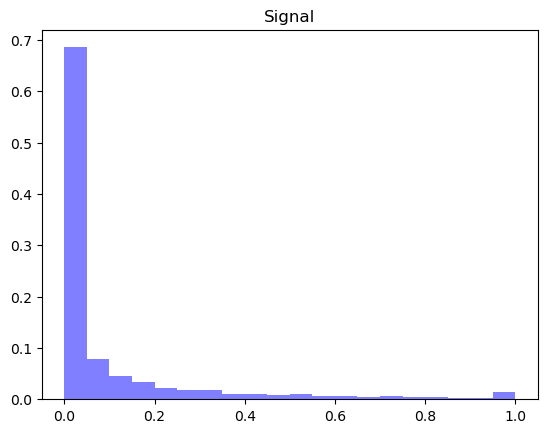

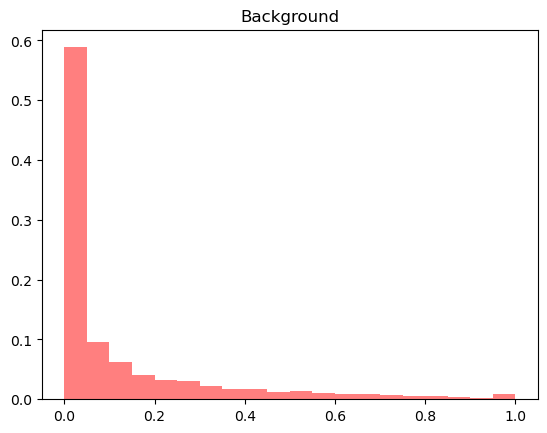

In [10]:
total_signal, total_back, x, y = findfourpointpdf("u", sample)

In [12]:
import pandas as pd
signal = np.array(total_signal)
back = np.array(total_back)
pd.DataFrame(signal).to_csv("signal_quad_raw2.csv")
pd.DataFrame(back).to_csv("back_quad_raw2.csv")
pd.DataFrame(x).to_csv("signal_quad_hist2.csv")
pd.DataFrame(y).to_csv("back_quad_hist2.csv")

In [55]:
z_hist_data, x_hist_data, r_hist_data = create_quadvertex_metrics_2D("u", sample)

  0%|                                                                                 | 2/3000 [00:01<30:44,  1.63it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:121: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
  0%|                                                                                 | 3/3000 [00:02<36:26,  1.37it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|                                                                                 | 4/3000 [00:02<32:48,  1.52it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (p

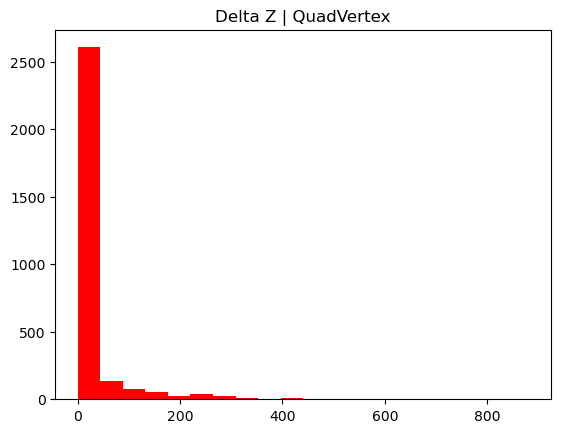

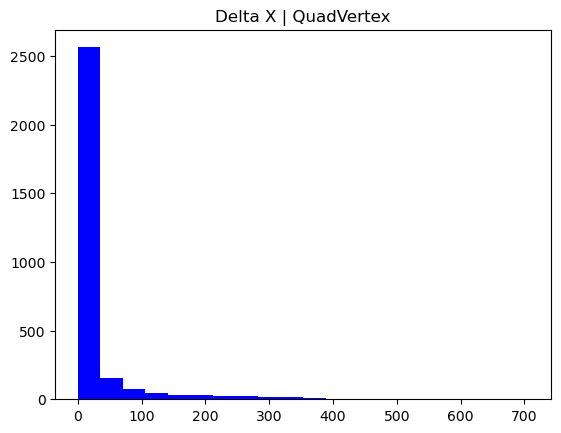

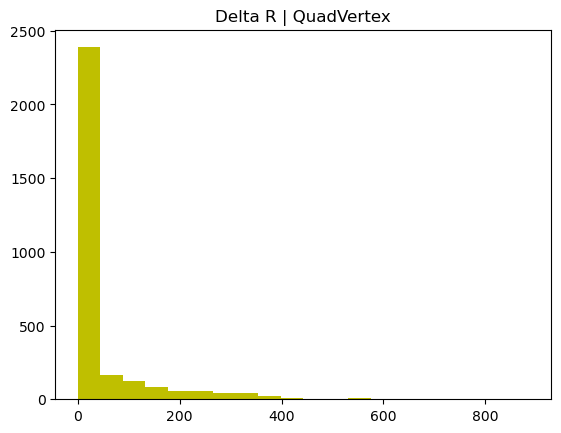

7.6132397460937575 0.12266666666666666
3.080891113281251 0.12166666666666667
12.445610084533694 0.19633333333333333


In [56]:
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | QuadVertex")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | QuadVertex")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | QuadVertex")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [58]:
print(z_hist_data)

[69.378296, 3.9958801, 0.9071655, 0.7780762, 0.0892334, 0.5664215, 25.92212, 34.3639, 10.035706, 0.7683716, 332.20514, 1.9503479, 5.430298, 6.238495, 47.947998, 43.598022, 0.31689453, 2.6451416, 11.731995, 296.22028, 29.851746, 0.77056885, 417.2069, 1.1503906, 1.9263916, 2.7841034, 4.7090454, 1.5189819, 1.0368652, 3.042694, 739.1084, 1.7783508, 3.8951416, 33.113464, 63.37123, 0.92523193, 0.2522583, 40.68956, 17.890259, 0.29720306, 0.6095581, 0.7817993, 10.390625, 2.9501648, 0.24102783, 5.9957275, 28.724651, 1.9713135, 1.142334, 1.4798431, 9.17337, 0.06982422, 98.9823, 0.5522766, 0.0021972656, 0.18981934, 1.2455444, 1.1176758, 66.36969, 79.87833, 41.05243, 140.74904, 3.1691895, 2.065979, 3.1696777, 23.77771, 31.392578, 0.3600464, 0.25531006, 3.5682373, 17.78186, 41.645996, 2.2871094, 254.16486, 58.894943, 1.5480347, 8.264374, 187.03285, 2.5892334, 0.45596313, 0.8352661, 16.298645, 75.7561, 0.59228516, 0.58351135, 244.19678, 6.02771, 7.121521, 0.5411377, 2.319458, 5.3997803, 2.9960938, 4

In [9]:
def create_quadvertex_metrics_3D(sample):
    x_hist_data = [None] * len(sample)
    y_hist_data = [None] * len(sample)
    z_hist_data = [None] * len(sample)
    r_hist_data = [None] * len(sample)
    for i in tqdm(range(len(sample))):
        AoI_xu, AoI_zu, AoI_adcu, Zvert_true_placeu, Xvert_true_placeu = AoI("u", sample[i])
        scores = quadvertex_scores("u", sample[i])
        max_score = np.amax(scores)
        ind = np.where(max_score)[0]
        x_posu, z_posu = AoI_xu[ind], AoI_zu[ind]
        
        AoI_xv, AoI_zv, AoI_adcv, Zvert_true_placev, Xvert_true_placev = AoI("v", sample[i])
        scores = quadvertex_scores("v", sample[i])
        max_score = np.amax(scores)
        ind = np.where(max_score)[0]
        x_posv, z_posv = AoI_xv[ind], AoI_zv[ind]
        
        AoI_xw, AoI_zw, AoI_adcw, Zvert_true_placew, Xvert_true_placew = AoI("w", sample[i])
        scores = quadvertex_scores("w", sample[i])
        max_score = np.amax(scores)
        ind = np.where(max_score)[0]
        x_posw, z_posw = AoI_xw[ind], AoI_zw[ind]
        
        
        x_diff = np.abs(((x_posu + x_posv + x_posw) / 3) - ((Xvert_true_placeu + Xvert_true_placev + Xvert_true_placew) / 3))
        
        yuv, zuv = uv_to_yz(z_posu, z_posv)
        yuw, zuw = uw_to_yz(z_posu, z_posw)
        yvw, zvw = vw_to_yz(z_posv, z_posw)
        
        yuv_true, zuv_true = uv_to_yz(Zvert_true_placeu, Zvert_true_placev)
        yuw_true, zuw_true = uw_to_yz(Zvert_true_placeu, Zvert_true_placew)
        yvw_true, zvw_true = vw_to_yz(Zvert_true_placev, Zvert_true_placew)
        
        y_diff = np.abs(((yuv + yuw + yvw) / 3) - ((yuv_true + yuw_true + yvw_true) / 3))
        z_diff = np.abs(((zuv + zuw + zvw) / 3) - ((zuv_true + zuw_true + zvw_true) / 3))
        
        r_diff = (x_diff ** 2 + y_diff ** 2 + z_diff ** 2)**(1/2)
        
        x_hist_data[i], y_hist_data[i], z_hist_data[i], r_hist_data[i] = x_diff[0], y_diff[0], z_diff[0], r_diff[0]

    
    return z_hist_data, y_hist_data, x_hist_data, r_hist_data

In [64]:
z_hist_data, y_hist_data, x_hist_data, r_hist_data = create_quadvertex_metrics_3D(sample)

  0%|                                                                                         | 0/3000 [00:00<?, ?it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|                                                                               | 1/3000 [00:01<1:22:54,  1.66s/it]C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_5112\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
  1%|▌                                          

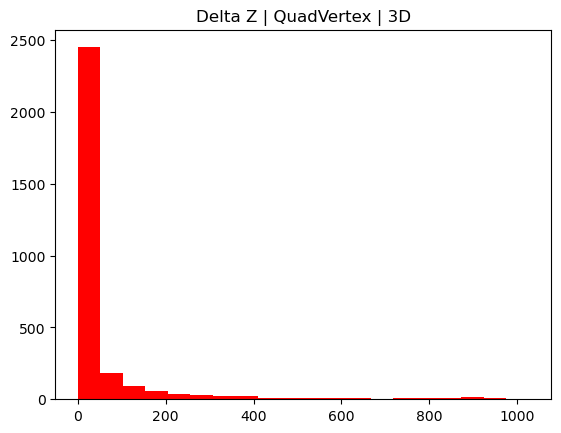

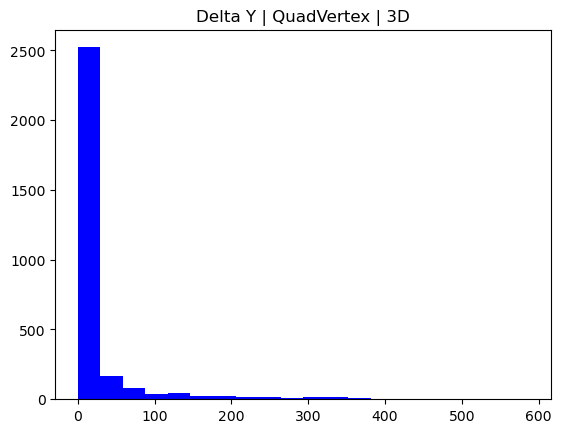

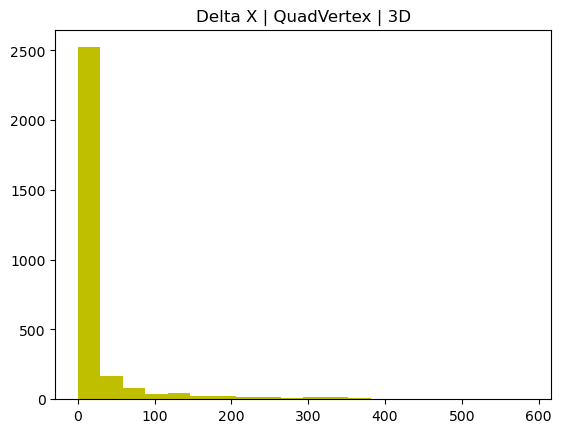

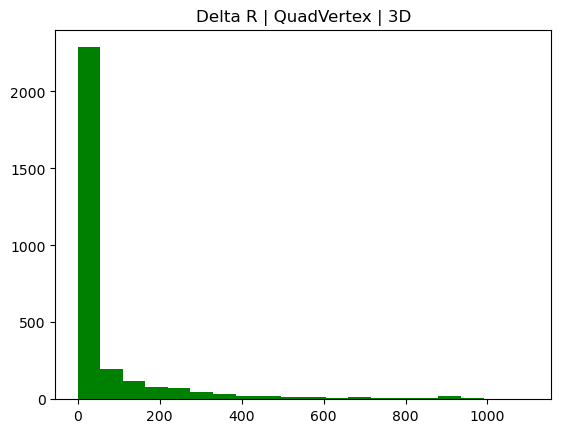

11.758093261718754 0.186
6.559698486328131 0.10833333333333334
3.6143261718750113 0.11766666666666667
22.191713180542017 0.245


In [65]:
plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | QuadVertex | 3D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta Y | QuadVertex | 3D")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='y')
title = plt.title("Delta X | QuadVertex | 3D")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='g')
title = plt.title("Delta R | QuadVertex | 3D")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68Y, pecentage_fifty_cmY = create_r68_and_50cm(y_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68Y, pecentage_fifty_cmY)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [60]:
interaction_dictionary = {}

import pandas as pd
import csv
import pandas as pd
import numpy as np

with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
def interaction_finder(events):
    all_events = np.unique(events.event_number)
    x = [ events.interaction_type[np.where(events.event_number == e)] for e in all_events ]
    return x

def interaction_selector(interaction_dictionary):
    #CC and NC Split
    CC_indexes = []
    NC_indexes = []
    QEL_indexes = []
    DIS_indexes = []
    RES_indexes = []
    EL_indexes = []
    MU_indexes = []
    
    for i in range(len(interaction_dictionary)):
        first_two = (interaction_dictionary[i])[:2]
        if first_two == 'CC':
            CC_indexes.append(i)
        elif first_two == 'NC':
            NC_indexes.append(i)
            
    for i in range(len(interaction_dictionary)):
        first_three = (interaction_dictionary[i])[2:5]
        if first_three == 'QEL':
            QEL_indexes.append(i)
        elif first_three == 'DIS':
            DIS_indexes.append(i)
        elif first_three == 'RES':
            RES_indexes.append(i)
            
    for i in range(len(interaction_dictionary)-2):
        first_one = (interaction_dictionary[i])[6:7]
        if first_one == 'M':
            MU_indexes.append(i)
        elif first_one == 'E':
            EL_indexes.append(i)
        
    return CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes

def interaction_splitting(interaction_type_array):
    CC_splitting = []
    NC_splitting = []
    QEL_splitting = []
    DIS_splitting = []
    RES_splitting = []
    EL_splitting = []
    MU_splitting = []

    for i in range(len(interaction_type_array)):
        if int(interaction_type_array[i][0]) in CC_indexes:
            CC_splitting.append(i)
        if int(interaction_type_array[i][0]) in NC_indexes:
            NC_splitting.append(i)
        if int(interaction_type_array[i][0]) in QEL_indexes:
            QEL_splitting.append(i)
        if int(interaction_type_array[i][0]) in RES_indexes:
            RES_splitting.append(i)
        if int(interaction_type_array[i][0]) in DIS_indexes:
            DIS_splitting.append(i)
        if int(interaction_type_array[i][0]) in MU_indexes:
            MU_splitting.append(i)
        if int(interaction_type_array[i][0]) in EL_indexes:
            EL_splitting.append(i)
        
    return CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting

In [61]:
CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes = interaction_selector(interaction_dictionary)


In [62]:
print(CC_indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 147]


In [63]:
print(MU_indexes)

[0, 1, 2, 3, 4, 5, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


In [64]:
CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting = interaction_splitting(interaction_finder(E))

In [26]:
print(MU_splitting)

[0, 2, 5, 7, 10, 13, 15, 16, 17, 20, 21, 28, 30, 32, 33, 34, 36, 39, 42, 45, 47, 48, 49, 52, 53, 66, 67, 69, 70, 73, 76, 77, 79, 83, 84, 89, 90, 91, 94, 96, 100, 101, 102, 106, 108, 110, 112, 114, 115, 119, 122, 123, 125, 127, 129, 130, 133, 134, 138, 140, 143, 144, 145, 148, 149, 150, 153, 155, 159, 165, 167, 168, 169, 172, 173, 174, 175, 177, 178, 179, 182, 183, 190, 191, 197, 200, 201, 203, 206, 207, 209, 212, 215, 216, 218, 220, 225, 227, 228, 229, 231, 236, 240, 241, 242, 244, 245, 246, 250, 251, 253, 254, 256, 258, 260, 261, 262, 263, 267, 273, 275, 277, 278, 280, 286, 287, 288, 290, 293, 294, 295, 300, 301, 305, 307, 311, 312, 316, 321, 322, 325, 327, 329, 330, 331, 333, 334, 335, 341, 344, 345, 346, 350, 351, 352, 354, 355, 356, 357, 358, 360, 362, 363, 365, 366, 367, 371, 374, 375, 377, 379, 380, 381, 387, 389, 390, 394, 395, 403, 406, 412, 414, 416, 417, 418, 419, 420, 423, 425, 429, 434, 437, 438, 439, 440, 443, 444, 446, 449, 452, 454, 455, 456, 457, 461, 462, 465, 466, 467

In [29]:
print(interaction_finder(E)[3])

[130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130]


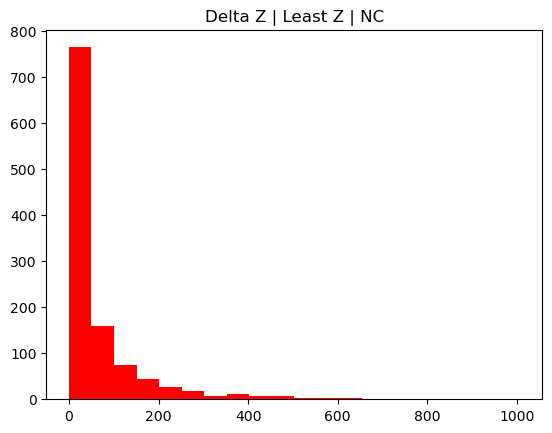

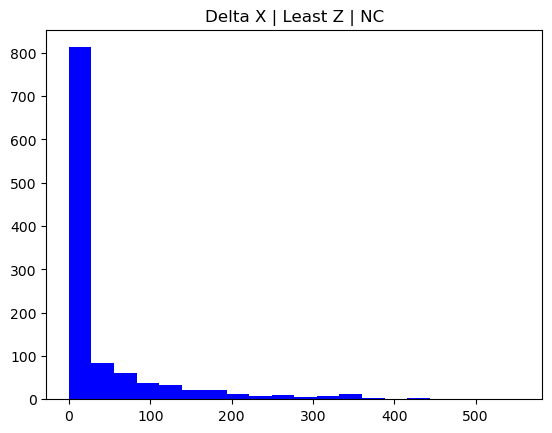

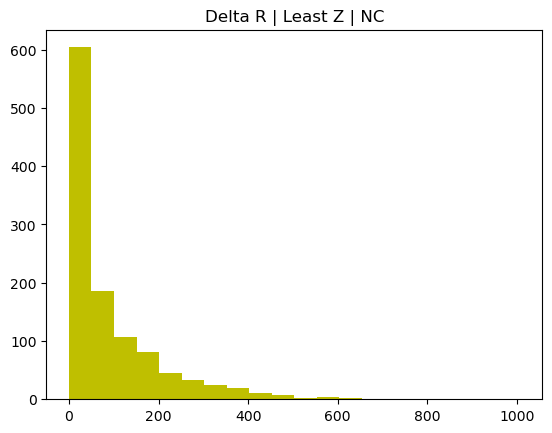

52.213728332519544 0.3250883392226148
20.767449111938483 0.21819787985865724
93.51754089355471 0.46819787985865724


In [38]:
z_hist_data, x_hist_data, r_hist_data = create_least_z_metrics(NC_splitting)

plt.clf()
x = plt.hist(z_hist_data, 20, color='r')
title = plt.title("Delta Z | Least Z | NC")
plt.show()

plt.clf()
x = plt.hist(x_hist_data, 20, color='b')
title = plt.title("Delta X | Least Z | NC")
plt.show()

plt.clf()
x = plt.hist(r_hist_data, 20, color='y')
title = plt.title("Delta R | Least Z | NC")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

100%|██████████████████████████████████████████████████████████████████████████████| 1132/1132 [00:45<00:00, 24.61it/s]


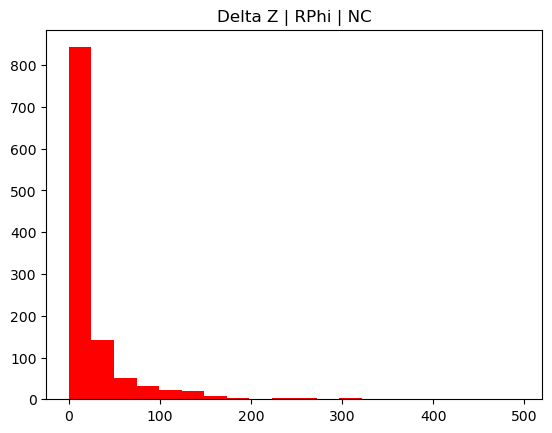

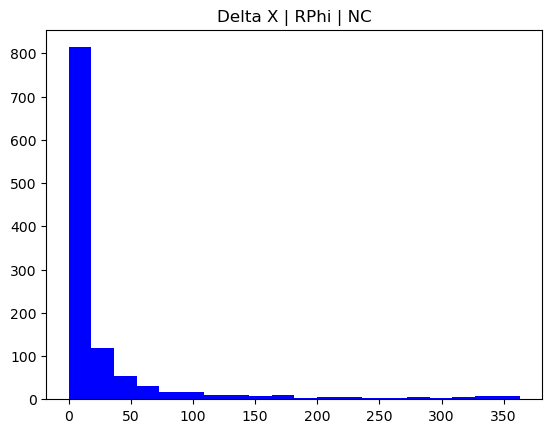

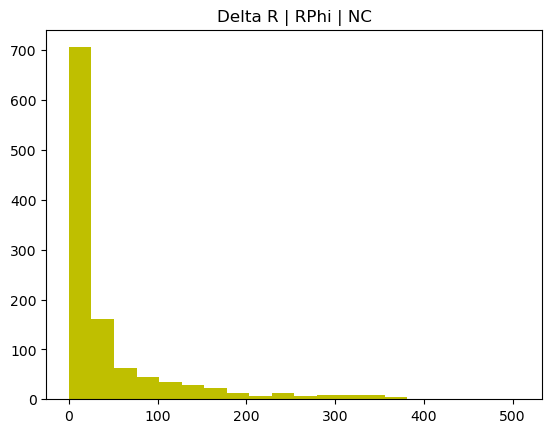

18.87775146484376 0.12985865724381626
14.8196337890625 0.14045936395759717
33.57558700561524 0.23763250883392226


100%|██████████████████████████████████████████████████████████████████████████████| 1504/1504 [02:53<00:00,  8.66it/s]


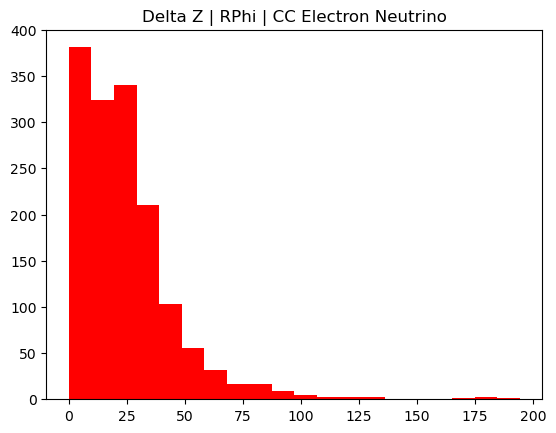

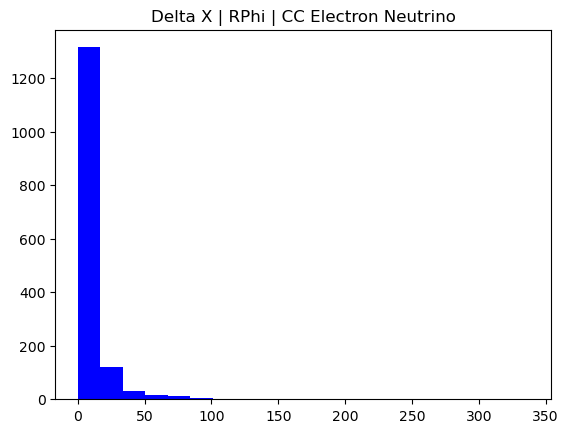

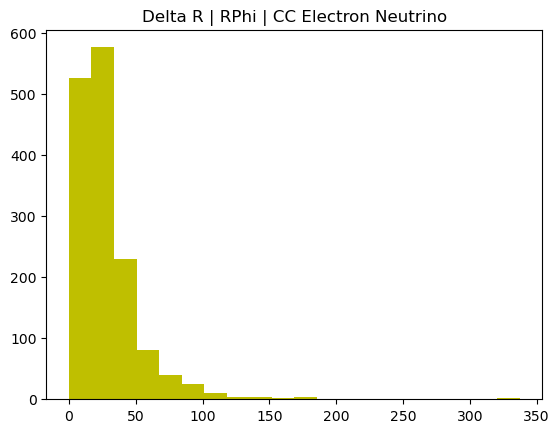

28.188623046875005 0.09109042553191489
7.536908569335938 0.02526595744680851
30.889706954956054 0.11569148936170212


100%|██████████████████████████████████████████████████████████████████████████████| 2074/2074 [05:26<00:00,  6.34it/s]


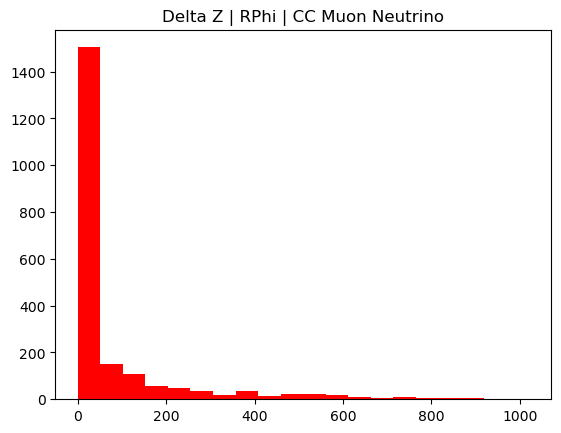

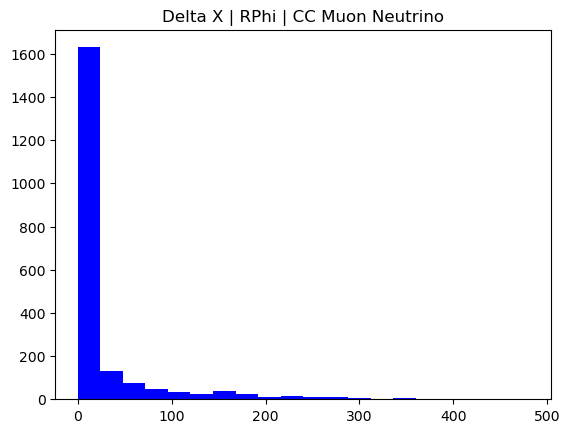

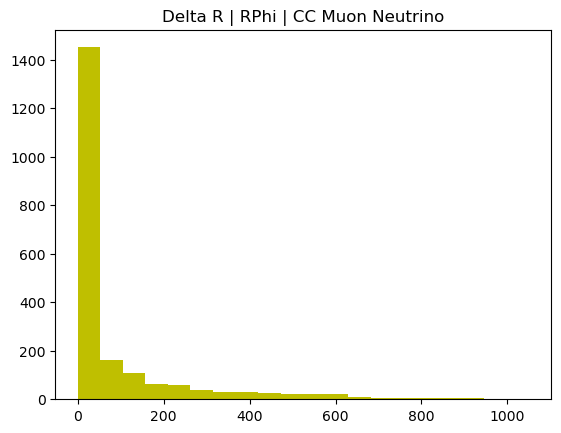

36.75608398437503 0.2777242044358727
10.199213943481455 0.14802314368370298
45.138429870605506 0.30810028929604627


In [39]:
z_hist_dataNC, x_hist_dataNC, r_hist_dataNC = rphi_accuracy("u", NC_splitting)

plt.clf()
x = plt.hist(z_hist_dataNC, 20, color='r')
title = plt.title("Delta Z | RPhi | NC")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataNC, 20, color='b')
title = plt.title("Delta X | RPhi | NC")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataNC, 20, color='y')
title = plt.title("Delta R | RPhi | NC")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataNC)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataNC)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataNC)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)




z_hist_dataCCE, x_hist_dataCCE, r_hist_dataCCE = rphi_accuracy("u", EL_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCE, 20, color='r')
title = plt.title("Delta Z | RPhi | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCE, 20, color='b')
title = plt.title("Delta X | RPhi | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCE, 20, color='y')
title = plt.title("Delta R | RPhi | CC Electron Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCE)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCE)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCE)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)





z_hist_dataCCMU, x_hist_dataCCMU, r_hist_dataCCMU = rphi_accuracy("u", MU_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCMU, 20, color='r')
title = plt.title("Delta Z | RPhi | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCMU, 20, color='b')
title = plt.title("Delta X | RPhi | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCMU, 20, color='y')
title = plt.title("Delta R | RPhi | CC Muon Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCMU)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCMU)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCMU)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

  0%|▏                                                                                | 3/1132 [00:01<09:30,  1.98it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  2%|█▏                                                                              | 17/1132 [00:09<10:18,  1.80it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:121: RuntimeWarning: invalid value encountered in divide
  scores = weights/np.amax(weights)
  4%|███▎                                                                            | 46/1132 [00:26<10:36,  1.71it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope 

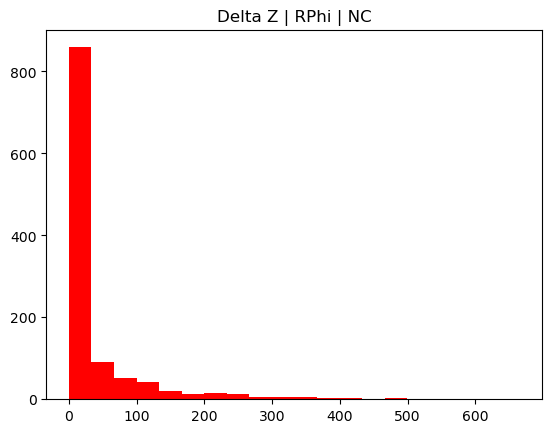

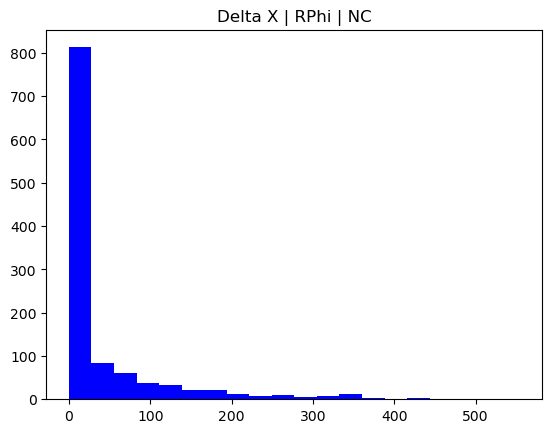

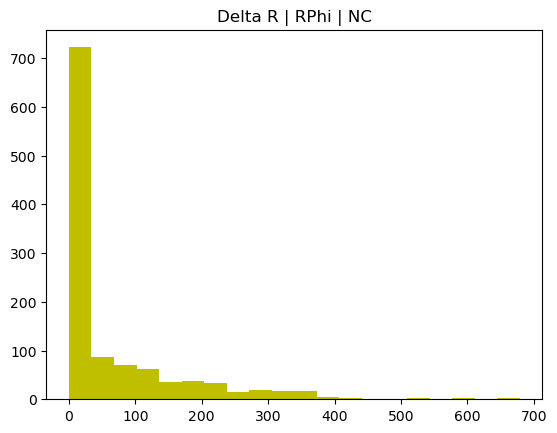

18.375200729370118 0.18992932862190812
20.767449111938483 0.21819787985865724
48.69024414062502 0.31713780918727913


100%|██████████████████████████████████████████████████████████████████████████████| 1504/1504 [16:35<00:00,  1.51it/s]


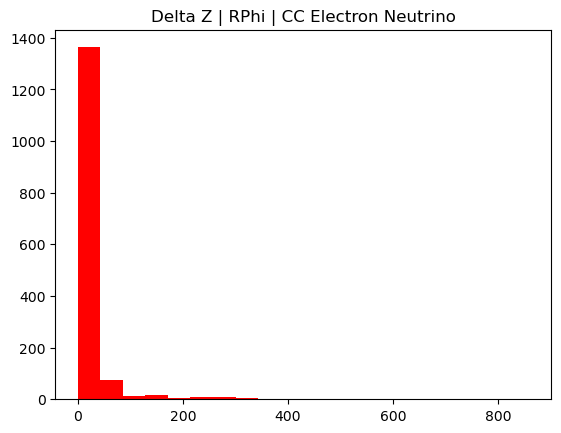

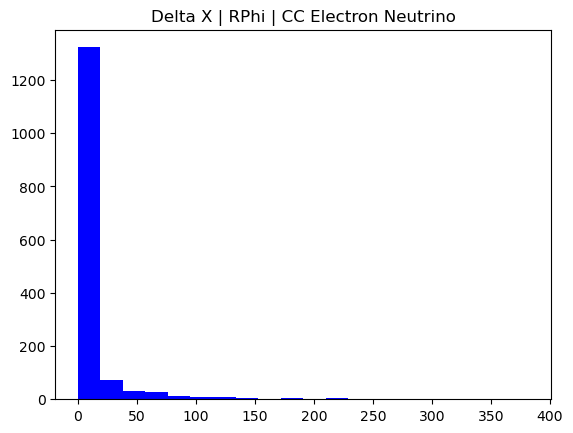

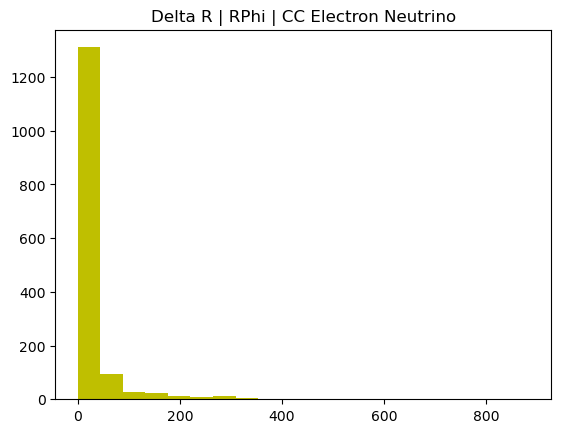

6.387856445312501 0.0851063829787234
1.5301360321044923 0.061835106382978726
7.310844669342041 0.11702127659574468


100%|██████████████████████████████████████████████████████████████████████████████| 2074/2074 [24:47<00:00,  1.39it/s]


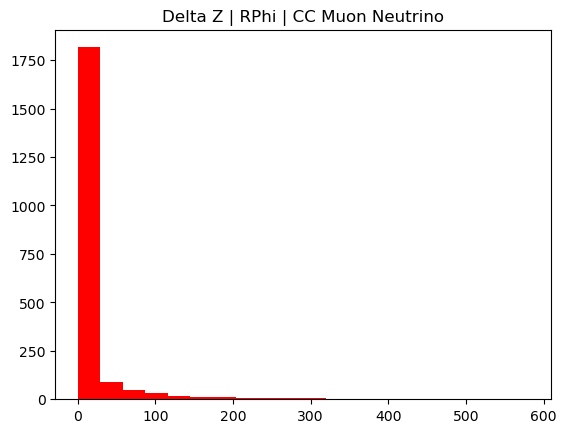

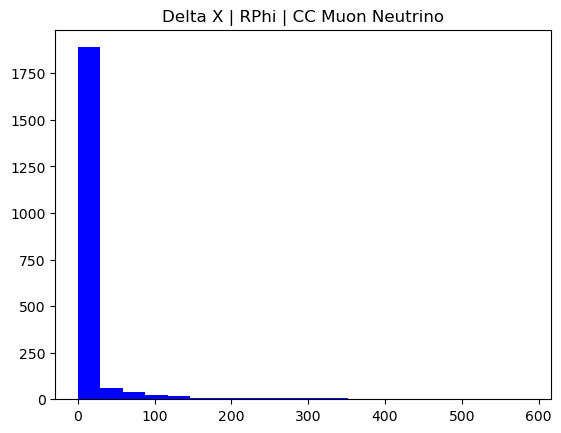

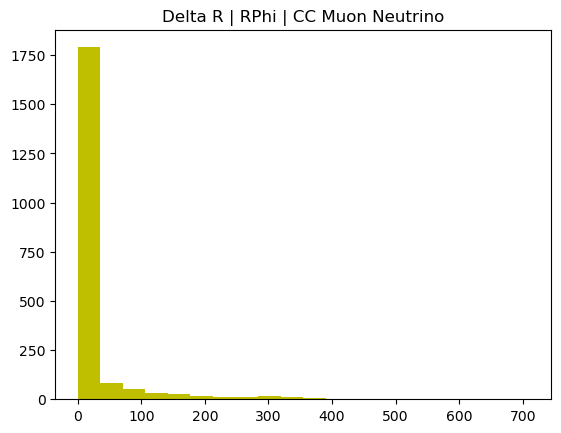

3.7401019287109385 0.08919961427193829
1.0752581787109385 0.06605593056894889
4.27903928756714 0.1171648987463838


In [40]:
z_hist_dataNC, x_hist_dataNC, r_hist_dataNC = create_quadvertex_metrics_2D("u", NC_splitting)

plt.clf()
x = plt.hist(z_hist_dataNC, 20, color='r')
title = plt.title("Delta Z | RPhi | NC")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataNC, 20, color='b')
title = plt.title("Delta X | RPhi | NC")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataNC, 20, color='y')
title = plt.title("Delta R | RPhi | NC")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataNC)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataNC)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataNC)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)




z_hist_dataCCE, x_hist_dataCCE, r_hist_dataCCE = create_quadvertex_metrics_2D("u", EL_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCE, 20, color='r')
title = plt.title("Delta Z | RPhi | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCE, 20, color='b')
title = plt.title("Delta X | RPhi | CC Electron Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCE, 20, color='y')
title = plt.title("Delta R | RPhi | CC Electron Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCE)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCE)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCE)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)





z_hist_dataCCMU, x_hist_dataCCMU, r_hist_dataCCMU = create_quadvertex_metrics_2D("u", MU_splitting)

plt.clf()
x = plt.hist(z_hist_dataCCMU, 20, color='r')
title = plt.title("Delta Z | RPhi | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(x_hist_dataCCMU, 20, color='b')
title = plt.title("Delta X | RPhi | CC Muon Neutrino")
plt.show()

plt.clf()
x = plt.hist(r_hist_dataCCMU, 20, color='y')
title = plt.title("Delta R | RPhi | CC Muon Neutrino")
plt.show()

r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_dataCCMU)
r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_dataCCMU)
r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_dataCCMU)

print(r68Z, pecentage_fifty_cmZ)
print(r68X, pecentage_fifty_cmX)
print(r68R, pecentage_fifty_cmR)

In [11]:
'''def find_error_least_z(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    for i in range(len(samples)):
        z_hist_data, x_hist_data, r_hist_data = create_least_z_metrics(list(samples[i]))
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)
        
        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
    
    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    
    return z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error'''
    

In [48]:
z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error = find_error_least_z(sample, 5)

In [53]:
print(z_hist_means, "\nError Z:", z_hist_error, x_hist_means, "\nError X:", x_hist_error, r_hist_means, "\nError R:", r_hist_error)

[66.90627441406252, 80.3555249023438, 63.34146179199222, 69.06316528320312, 76.67170043945315] 
Error Z: 2.817793752329891 [2.5019299316406314, 3.014520263671876, 2.636638183593753, 3.5999780273437563, 3.6048339843750004] 
Error X: 0.20789378871943137 [87.82972290039066, 100.18392333984376, 88.10580963134768, 93.95913208007815, 99.91714935302734] 
Error R: 2.4171804275207744


In [12]:
def find_error_rphi(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    for i in range(len(samples)):
        z_hist_data, x_hist_data, r_hist_data = rphi_accuracy("u", list(samples[i]))
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)
        
        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
    
    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    
    return z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error

In [55]:
z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error = find_error_rphi(sample, 5)
print(z_hist_means, "\nError Z:", z_hist_error, x_hist_means, "\nError X:", x_hist_error, r_hist_means, "\nError R:", r_hist_error)

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [02:05<00:00,  4.79it/s]

[22.784560546875, 23.815888671875005, 23.59976318359375, 22.191679687500006, 25.559677429199226] 
Error Z: 0.511264397479605 [6.58187194824219, 7.035441894531266, 8.054876098632812, 7.021962585449219, 8.447043762207032] 
Error X: 0.3140907177402354 [28.60263107299805, 30.30204841613771, 30.32800315856934, 28.883202514648463, 32.797160644531274] 
Error R: 0.6650134735892641


In [13]:
def find_error_quadvertex(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    for i in range(len(samples)):
        z_hist_data, x_hist_data, r_hist_data = create_quadvertex_metrics_2D("u", list(samples[i]))
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)
        
        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
    
    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    
    return z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error

In [57]:
z_hist_means, z_hist_error, x_hist_means, x_hist_error, r_hist_means, r_hist_error = find_error_quadvertex(sample, 5)
print(z_hist_means, "\nError Z:", z_hist_error, x_hist_means, "\nError X:", x_hist_error, r_hist_means, "\nError R:", r_hist_error)

  0%|                                                                                          | 0/600 [00:00<?, ?it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  1%|▌                                                                                 | 4/600 [00:02<06:36,  1.50it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 37%|█████████████████████████████▋         

[7.127009277343751, 8.210877685546885, 6.781762695312502, 7.603569335937503, 7.703187255859379] 
Error Z: 0.22011473818200147 [2.5019299316406314, 3.014520263671876, 2.636638183593753, 3.5999780273437563, 3.6048339843750004] 
Error X: 0.20789378871943137 [10.665804176330575, 13.801067657470707, 10.711630058288582, 11.90621212005616, 14.277947044372558] 
Error R: 0.6785363713697005


In [65]:
def find_problems_rphi(sample):

    z_hist_data, x_hist_data, r_hist_data = create_quadvertex_metrics_2D("u", sample)
    
    #z_hist_data = z_hist_data.tolist()
    #x_hist_data = x_hist_data.tolist()
    #r_hist_data = r_hist_data.tolist()
    
    def condition(x): return x > 50
    z_indices = [idx for idx, element in enumerate(z_hist_data) if condition(element)]
    x_indices = [idx for idx, element in enumerate(x_hist_data) if condition(element)]
    r_indices = [idx for idx, element in enumerate(r_hist_data) if condition(element)]
    
    return z_indices, x_indices, r_indices
        

In [73]:
z_indices, x_indices, r_indices = find_problems_rphi(EL_splitting)

  0%|                                                                                 | 1/1504 [00:00<13:09,  1.90it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1
  0%|▏                                                                                | 4/1504 [00:02<14:39,  1.70it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
 11%|████████▎                              

In [74]:
def plot_problem_points_rphi(sample, no_graphs=3):
    
    for i in range(no_graphs):
        
        event = random.choice(sample)
        
        AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI("u", event)

        scores = quadvertex_scores("u", event)
        max_score = np.amax(scores)
        ind = np.where(max_score)[0]
        x_pos, z_pos = AoI_x[ind], AoI_z[ind]
        

        plt.scatter(AoI_z, AoI_x, s=4)
        plt.scatter(z_pos, x_pos, color='r', s=6)
        plt.title("u"+str(event))
        plt.xlabel("z")
        plt.ylabel("x")
        plt.show()
    
    return 0

C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_27460\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1


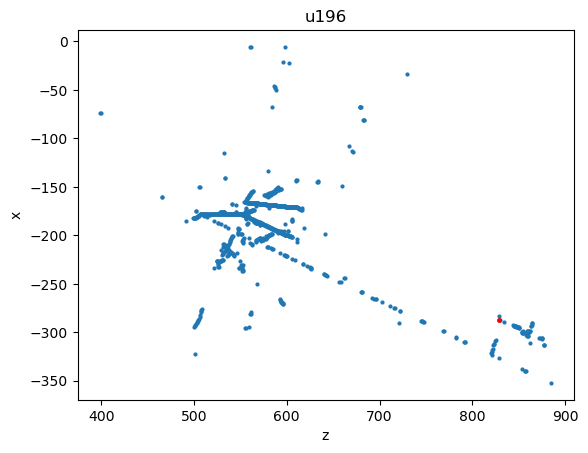

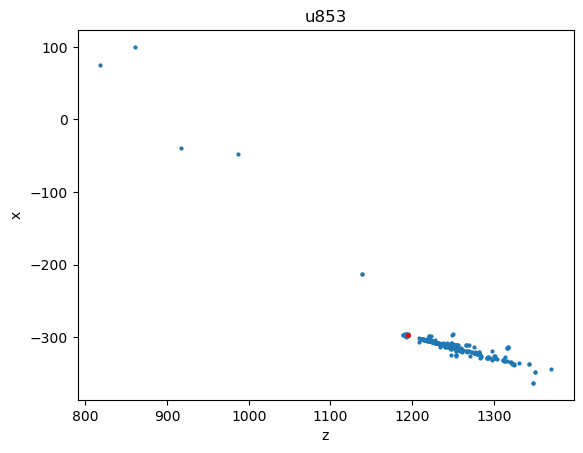

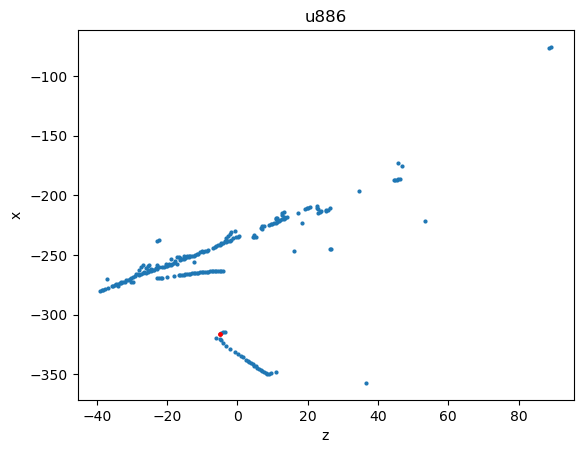

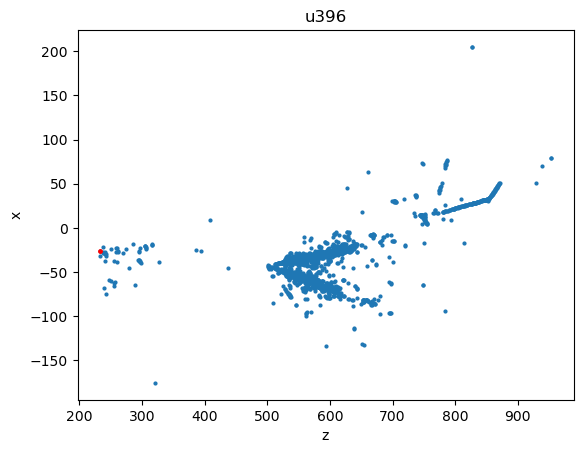

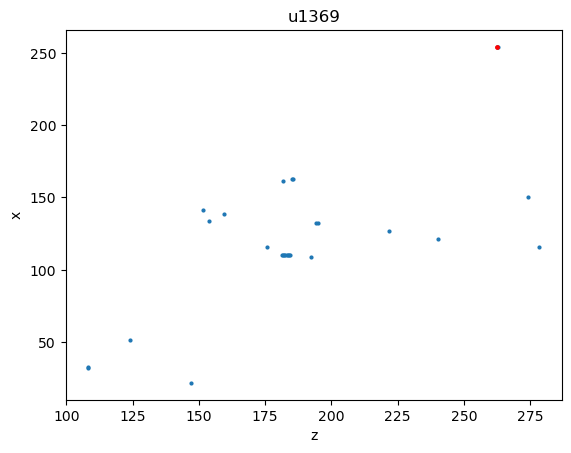

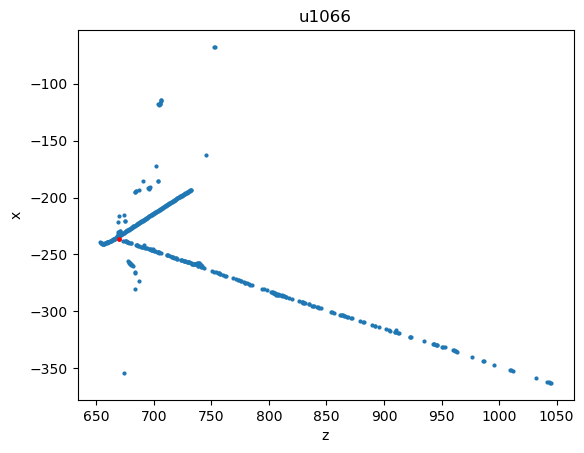

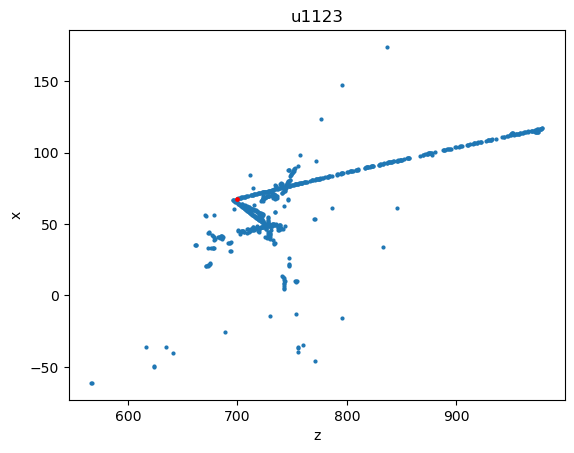

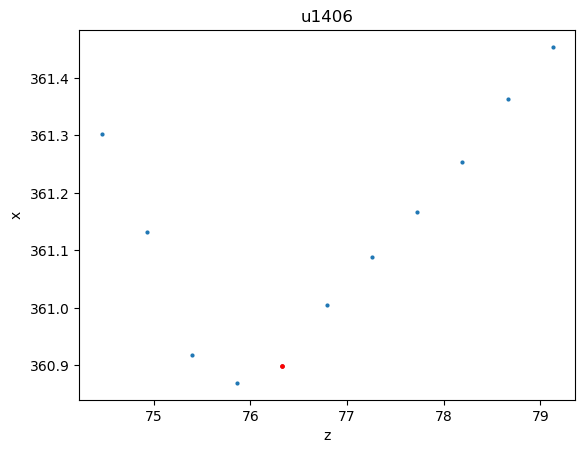

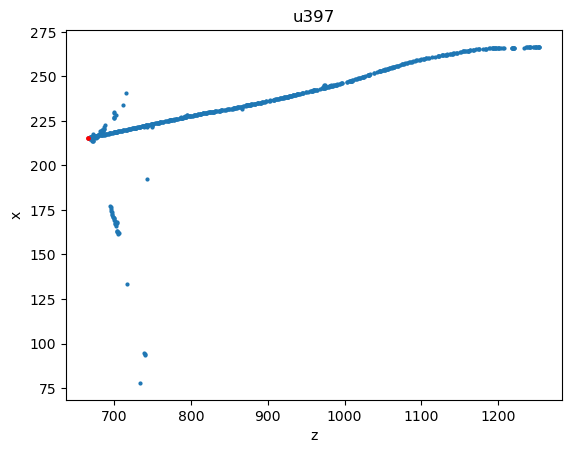

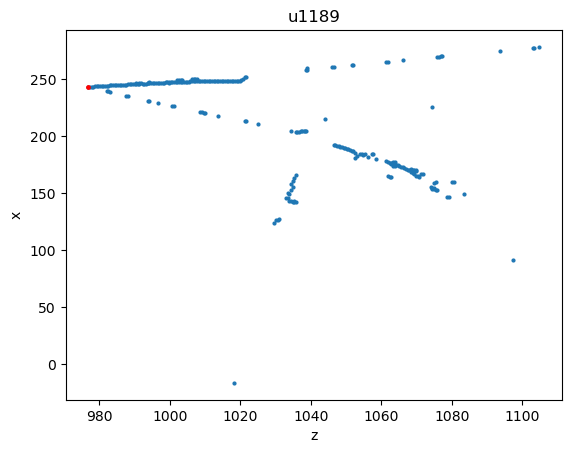

0

In [75]:
plot_problem_points_rphi(z_indices, 10)

In [48]:
import numpy as np
def find_error_least_z_2D(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    pecentage_fifty_cmZ_means = []
    pecentage_fifty_cmX_means = []
    pecentage_fifty_cmR_means = []
    for i in tqdm(range(splits)):
        
        z_hist_data, x_hist_data, r_hist_data = [None] * len(samples[i]), [None] * len(samples[i]), [None] * len(samples[i])
        
        z_hist_data, x_hist_data, r_hist_data = create_least_z_metrics_2D(list(samples[i]))
        
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
        pecentage_fifty_cmZ_means.append(pecentage_fifty_cmZ)
        pecentage_fifty_cmX_means.append(pecentage_fifty_cmX)
        pecentage_fifty_cmR_means.append(pecentage_fifty_cmR)

    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    z_percent_error = np.std(pecentage_fifty_cmZ_means) / np.sqrt(len(pecentage_fifty_cmZ_means))
    x_percent_error = np.std(pecentage_fifty_cmX_means) / np.sqrt(len(pecentage_fifty_cmX_means))
    r_percent_error = np.std(pecentage_fifty_cmR_means) / np.sqrt(len(pecentage_fifty_cmR_means))
    
    return z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error

In [49]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_least_z_2D(sample, 5)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.30it/s]


In [50]:
least_z_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

In [51]:
print(least_z_bundle_errors)

(0.006873459423350396, 1.5993188382100543, 0.0036086316273931623, 0.4245152454432236, 0.009446927778089797, 3.3898202117534098)


In [52]:
def find_error_rphi_2D(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    pecentage_fifty_cmZ_means = []
    pecentage_fifty_cmX_means = []
    pecentage_fifty_cmR_means = []
    for i in tqdm(range(splits)):
        
        z_hist_data, x_hist_data, r_hist_data = rphi_accuracy("u", list(samples[i]))
        
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
        pecentage_fifty_cmZ_means.append(pecentage_fifty_cmZ)
        pecentage_fifty_cmX_means.append(pecentage_fifty_cmX)
        pecentage_fifty_cmR_means.append(pecentage_fifty_cmR)

    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    z_percent_error = np.std(pecentage_fifty_cmZ_means) / np.sqrt(len(pecentage_fifty_cmZ_means))
    x_percent_error = np.std(pecentage_fifty_cmX_means) / np.sqrt(len(pecentage_fifty_cmX_means))
    r_percent_error = np.std(pecentage_fifty_cmR_means) / np.sqrt(len(pecentage_fifty_cmR_means))
    
    return z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error

In [53]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_rphi_2D(sample, 5)
rphi_2D_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

 18%|██████████████▎                                                                 | 107/600 [00:18<01:44,  4.72it/s]


 33%|██████████████████████████▌                                                     | 199/600 [00:39<01:30,  4.42it/s]


 50%|████████████████████████████████████████▏                                       | 301/600 [01:07<01:12,  4.12it/s]


 68%|██████████████████████████████████████████████████████▊                         | 411/600 [01:34<00:30,  6.24it/s]


 84%|███████████████████████████████████████████████████████████████████             | 503/600 [01:54<00:18,  5.32it/s]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 595/600 [02:19<00:02,  2.32it/s]


 17%|█████████████▍                                                                  | 101/600 [00:23<03:11,  2.61it/s]


 33%|██████████████████████████▏                                                     | 196/600 [00:44<01:49,  3.69it/s]


 50%|███████████████████████████████████████▌                                        | 297/600 [01:08<01:34,  3.20it/s]


 67%|█████████████████████████████████████████████████████▊                          | 404/600 [01:32<01:42,  1.92it/s]


 84%|███████████████████████████████████████████████████████████████████▌            | 507/600 [01:59<00:18,  5.15it/s]


  1%|▉                                                                                 | 7/600 [00:01<02:19,  4.25it/s]


 17%|█████████████▍                                                                  | 101/600 [00:28<01:56,  4.27it/s]


 34%|███████████████████████████                                                     | 203/600 [00:54<01:15,  5.24it/s]


 50%|████████████████████████████████████████▍                                       | 303/600 [01:14<00:34,  8.57it/s]


 68%|██████████████████████████████████████████████████████▌                         | 409/600 [01:39<00:42,  4.53it/s]


 83%|██████████████████████████████████████████████████████████████████▌             | 499/600 [02:00<00:26,  3.77it/s]


100%|███████████████████████████████████████████████████████████████████████████████▋| 598/600 [02:24<00:00,  3.47it/s]


 18%|██████████████▎                                                                 | 107/600 [00:21<04:07,  1.99it/s]


 36%|████████████████████████████▍                                                   | 213/600 [00:40<01:00,  6.38it/s]


 55%|███████████████████████████████████████████▋                                    | 328/600 [01:03<01:12,  3.74it/s]


 70%|███████████████████████████████████████████████████████▌                        | 417/600 [01:26<01:13,  2.51it/s]


 86%|████████████████████████████████████████████████████████████████████▍           | 513/600 [01:52<00:12,  6.71it/s]


  1%|▉                                                                                 | 7/600 [00:00<01:12,  8.22it/s]


 19%|███████████████▍                                                                | 116/600 [00:21<02:43,  2.96it/s]


 38%|██████████████████████████████▌                                                 | 229/600 [00:43<01:31,  4.07it/s]


 56%|████████████████████████████████████████████▌                                   | 334/600 [01:12<01:23,  3.17it/s]


 72%|█████████████████████████████████████████████████████████▋                      | 433/600 [01:33<00:25,  6.64it/s]


 88%|██████████████████████████████████████████████████████████████████████▎         | 527/600 [01:54<00:17,  4.22it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [11:27<00:00, 137.49s/it]


In [55]:
print(rphi_2D_bundle_errors)

(0.0029287843515318403, 0.5797302934867863, 0.0010110500592068739, 0.25650223829507496, 0.004386849033696558, 0.574642026625137)


In [56]:
def find_error_quadvertex_2D(sample, splits):
    samples = np.array_split(sample, splits)
    z_hist_means = []
    x_hist_means = []
    r_hist_means = []
    pecentage_fifty_cmZ_means = []
    pecentage_fifty_cmX_means = []
    pecentage_fifty_cmR_means = []
    for i in tqdm(range(splits)):
        
        z_hist_data, x_hist_data, r_hist_data = create_quadvertex_metrics_2D("u", list(samples[i]))
        
        r68Z, pecentage_fifty_cmZ = create_r68_and_50cm(z_hist_data)
        r68X, pecentage_fifty_cmX = create_r68_and_50cm(x_hist_data)
        r68R, pecentage_fifty_cmR = create_r68_and_50cm(r_hist_data)

        z_hist_means.append(r68Z)
        x_hist_means.append(r68X)
        r_hist_means.append(r68R)
        pecentage_fifty_cmZ_means.append(pecentage_fifty_cmZ)
        pecentage_fifty_cmX_means.append(pecentage_fifty_cmX)
        pecentage_fifty_cmR_means.append(pecentage_fifty_cmR)

    z_hist_error = np.std(z_hist_means) / np.sqrt(len(z_hist_means))
    x_hist_error = np.std(x_hist_means) / np.sqrt(len(x_hist_means))
    r_hist_error = np.std(r_hist_means) / np.sqrt(len(r_hist_means))
    z_percent_error = np.std(pecentage_fifty_cmZ_means) / np.sqrt(len(pecentage_fifty_cmZ_means))
    x_percent_error = np.std(pecentage_fifty_cmX_means) / np.sqrt(len(pecentage_fifty_cmX_means))
    r_percent_error = np.std(pecentage_fifty_cmR_means) / np.sqrt(len(pecentage_fifty_cmR_means))
    
    return z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error

In [57]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_quadvertex_2D(sample, 5)
quadvertex_2D_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

  0%|                                                                                          | 0/600 [00:00<?, ?it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1

  0%|▍                                                                                 | 3/600 [00:02<07:37,  1.31it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)

 10%|███████▊                             

 21%|████████████████▌                                                               | 124/600 [01:44<08:13,  1.04s/it]


 32%|█████████████████████████▎                                                      | 190/600 [02:38<05:23,  1.27it/s]


 43%|██████████████████████████████████▏                                             | 256/600 [03:32<05:47,  1.01s/it]


 44%|██████████████████████████████████▉                                             | 262/600 [03:36<04:28,  1.26it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:121: RuntimeWarning: invalid value encountered in true_divide
  scores = weights/np.amax(weights)

 54%|██████████████████████████████████████████▊                                     | 321/600 [04:25<03:30,  1.33it/s]


 64%|███████████████████████████████████████████████████▌                            | 387/600 [05:17<02:33,  1.39it/s]


 76%|████████████████████████████████████████████████████████████▍                   | 453/600 [06:08<01:56,  1.27it/s]


 86%|█████████████████████████████████████████████████████████████████████▏          | 519/600 [07:01<01:07,  1.20it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 586/600 [07:50<00:10,  1.39it/s]


  8%|██████▊                                                                          | 50/600 [00:39<08:37,  1.06it/s]


 19%|███████████████▍                                                                | 116/600 [01:38<06:17,  1.28it/s]


 30%|████████████████████████▎                                                       | 182/600 [02:38<06:30,  1.07it/s]


 41%|█████████████████████████████████                                               | 248/600 [03:32<05:55,  1.01s/it]


 52%|█████████████████████████████████████████▊                                      | 314/600 [04:29<04:17,  1.11it/s]


 63%|██████████████████████████████████████████████████▋                             | 380/600 [05:24<03:15,  1.12it/s]


 74%|███████████████████████████████████████████████████████████▍                    | 446/600 [06:17<01:57,  1.31it/s]


 85%|████████████████████████████████████████████████████████████████████▎           | 512/600 [07:06<01:06,  1.32it/s]


 96%|█████████████████████████████████████████████████████████████████████████████   | 578/600 [07:59<00:17,  1.28it/s]


  7%|█████▋                                                                           | 42/600 [00:34<07:31,  1.24it/s]


 18%|██████████████▍                                                                 | 108/600 [01:23<06:07,  1.34it/s]


 29%|███████████████████████▎                                                        | 175/600 [02:15<05:36,  1.26it/s]


 40%|████████████████████████████████▏                                               | 241/600 [03:05<04:51,  1.23it/s]


 51%|████████████████████████████████████████▉                                       | 307/600 [03:59<03:43,  1.31it/s]


 62%|█████████████████████████████████████████████████▋                              | 373/600 [04:54<02:58,  1.27it/s]


 73%|██████████████████████████████████████████████████████████▌                     | 439/600 [05:45<01:57,  1.37it/s]


 84%|███████████████████████████████████████████████████████████████████▎            | 505/600 [06:36<01:10,  1.34it/s]


 95%|████████████████████████████████████████████████████████████████████████████▏   | 571/600 [07:27<00:21,  1.36it/s]


  6%|████▋                                                                            | 35/600 [00:27<07:14,  1.30it/s]


 17%|█████████████▍                                                                  | 101/600 [01:18<07:09,  1.16it/s]


 28%|██████████████████████▎                                                         | 167/600 [02:10<05:49,  1.24it/s]


 39%|███████████████████████████████                                                 | 233/600 [03:02<05:11,  1.18it/s]


 50%|███████████████████████████████████████▊                                        | 299/600 [03:53<04:31,  1.11it/s]


 61%|████████████████████████████████████████████████▋                               | 365/600 [04:44<02:48,  1.40it/s]


 72%|█████████████████████████████████████████████████████████▍                      | 431/600 [05:33<02:00,  1.40it/s]


 83%|██████████████████████████████████████████████████████████████████▎             | 497/600 [06:25<01:15,  1.37it/s]


 94%|███████████████████████████████████████████████████████████████████████████     | 563/600 [07:20<01:00,  1.64s/it]


  4%|███▋                                                                             | 27/600 [00:21<07:12,  1.32it/s]


 16%|████████████▌                                                                    | 93/600 [01:12<06:23,  1.32it/s]


 26%|█████████████████████▏                                                          | 159/600 [02:02<05:24,  1.36it/s]


 38%|██████████████████████████████                                                  | 225/600 [02:53<04:44,  1.32it/s]


 48%|██████████████████████████████████████▊                                         | 291/600 [03:47<03:54,  1.32it/s]


 60%|███████████████████████████████████████████████▌                                | 357/600 [04:43<03:12,  1.26it/s]


 70%|████████████████████████████████████████████████████████▍                       | 423/600 [05:37<02:22,  1.24it/s]


 82%|█████████████████████████████████████████████████████████████████▏              | 489/600 [06:29<01:24,  1.32it/s]


 92%|██████████████████████████████████████████████████████████████████████████      | 555/600 [07:20<00:35,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [40:02<00:00, 480.52s/it]


In [58]:
print(quadvertex_2D_bundle_errors)

(0.00412040990409665, 0.3838141512388174, 0.0036086316273931623, 0.4245152454432236, 0.006342099196813485, 1.1073330932951926)


In [65]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_least_z_2D(EL_splitting, 5)
least_z_2D_EL_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.13it/s]


In [67]:
print(least_z_2D_EL_bundle_errors)

(0.008924604917011908, 1.9647314263340436, 0.0030632508787390837, 0.10837781560268293, 0.009892866145112604, 1.9694730810204804)


In [68]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_least_z_2D(MU_splitting, 5)
least_z_2D_MU_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.44it/s]


In [69]:
print(least_z_2D_MU_bundle_errors)

(0.005192285436368281, 1.8666485942693922, 0.0011228067605254578, 0.11371130316397388, 0.002412044461079316, 1.5716291936993563)


In [70]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_least_z_2D(NC_splitting, 5)
least_z_2D_NC_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 39.84it/s]


In [71]:
print(least_z_2D_NC_bundle_errors)

(0.007582566222339932, 2.2498165846761564, 0.00945288501216072, 1.6949925698914534, 0.0105617422307922, 4.481824111464786)


In [73]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_rphi_2D(EL_splitting, 5)
rphi_2D_EL_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_rphi_2D(MU_splitting, 5)
rphi_2D_MU_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_rphi_2D(NC_splitting, 5)
rphi_2D_NC_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

print(rphi_2D_EL_bundle_errors)
print(rphi_2D_MU_bundle_errors)
print(rphi_2D_NC_bundle_errors)

 28%|██████████████████████▎                                                          | 83/301 [00:12<00:34,  6.39it/s]


 61%|█████████████████████████████████████████████████▏                              | 185/301 [00:27<00:13,  8.88it/s]


 96%|████████████████████████████████████████████████████████████████████████████▌   | 288/301 [00:40<00:01,  8.02it/s]


 29%|███████████████████████▋                                                         | 88/301 [00:12<00:20, 10.41it/s]


 63%|██████████████████████████████████████████████████▏                             | 189/301 [00:26<00:16,  6.77it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 296/301 [00:39<00:00,  8.43it/s]


 32%|█████████████████████████▌                                                       | 95/301 [00:13<00:35,  5.85it/s]


 67%|█████████████████████████████████████████████████████▍                          | 201/301 [00:26<00:08, 11.88it/s]


  7%|█████▋                                                                           | 21/301 [00:02<00:44,  6.27it/s]


 48%|██████████████████████████████████████▎                                         | 144/301 [00:16<00:42,  3.67it/s]


 82%|█████████████████████████████████████████████████████████████████▉              | 248/301 [00:30<00:05,  9.25it/s]


 15%|████████████▏                                                                    | 45/300 [00:05<00:28,  9.01it/s]


 55%|████████████████████████████████████████████▎                                   | 166/300 [00:20<00:20,  6.67it/s]


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [00:34<00:03,  7.39it/s]


 18%|██████████████▏                                                                  | 73/415 [00:12<01:03,  5.41it/s]


 41%|████████████████████████████████▉                                               | 171/415 [00:30<00:41,  5.83it/s]


 65%|████████████████████████████████████████████████████                            | 270/415 [00:48<00:13, 10.80it/s]


 88%|██████████████████████████████████████████████████████████████████████▎         | 365/415 [01:07<00:10,  4.70it/s]


  9%|███████▍                                                                         | 38/415 [00:07<00:51,  7.31it/s]


 30%|████████████████████████                                                        | 125/415 [00:24<01:40,  2.89it/s]


 51%|████████████████████████████████████████▋                                       | 211/415 [00:41<00:51,  3.94it/s]


 71%|████████████████████████████████████████████████████████▍                       | 293/415 [00:59<00:21,  5.78it/s]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 391/415 [01:19<00:05,  4.06it/s]


 17%|██████████████                                                                   | 72/415 [00:13<01:02,  5.51it/s]


 41%|████████████████████████████████▉                                               | 171/415 [00:31<00:45,  5.37it/s]


 67%|█████████████████████████████████████████████████████▉                          | 280/415 [00:47<00:21,  6.25it/s]


 89%|███████████████████████████████████████████████████████████████████████▎        | 370/415 [01:04<00:07,  6.08it/s]


 11%|████████▉                                                                        | 46/415 [00:07<00:43,  8.52it/s]


 33%|██████████████████████████▌                                                     | 138/415 [00:26<00:35,  7.86it/s]


 57%|█████████████████████████████████████████████▎                                  | 235/415 [00:44<00:42,  4.25it/s]


 79%|███████████████████████████████████████████████████████████████                 | 327/415 [01:03<00:12,  6.85it/s]


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [05:09<01:17, 77.10s/it]


 21%|████████████████▋                                                                | 85/414 [00:15<00:49,  6.65it/s]


 44%|███████████████████████████████████▎                                            | 183/414 [00:32<00:32,  7.16it/s]


 66%|████████████████████████████████████████████████████▉                           | 274/414 [01:31<07:01,  3.01s/it]


 92%|█████████████████████████████████████████████████████████████████████████▊      | 382/414 [01:49<00:08,  3.78it/s]


 55%|███████████████████████████████████████████▋                                    | 124/227 [00:06<00:04, 21.36it/s]


 58%|██████████████████████████████████████████████▏                                 | 131/227 [00:06<00:04, 21.10it/s]


 64%|██████████████████████████████████████████████████▉                             | 144/226 [00:07<00:05, 15.69it/s]


 64%|██████████████████████████████████████████████████▉                             | 144/226 [00:06<00:02, 28.30it/s]


 67%|█████████████████████████████████████████████████████▍                          | 151/226 [00:06<00:03, 21.77it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.11s/it]

(0.006042723633855672, 0.4287044963048001, 0.0022258543377063227, 0.1865324418890065, 0.004905689234224798, 0.4547882320968935)
(0.010105078740819248, 2.6164330319627207, 0.005743296190581602, 0.8227669269112106, 0.0110622864702793, 4.308641684308138)
(0.006975670141643056, 1.3544800860022586, 0.011368507802716626, 0.9040117814009023, 0.012668925736076643, 2.5040773048633307)


In [74]:
z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_quadvertex_2D(EL_splitting, 5)
quad_2D_EL_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_quadvertex_2D(MU_splitting, 5)
quad_2D_MU_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error = find_error_quadvertex_2D(NC_splitting, 5)
quad_2D_NC_bundle_errors = (z_percent_error, z_hist_error, x_percent_error, x_hist_error, r_percent_error, r_hist_error)

print(quad_2D_EL_bundle_errors)
print(quad_2D_MU_bundle_errors)
print(quad_2D_NC_bundle_errors)

  0%|▎                                                                                 | 1/301 [00:00<03:33,  1.40it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)
C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:8: RuntimeWarning: invalid value encountered in float_scalars
  z_point = slope1 * x_point + intercept1

  3%|██▍                                                                               | 9/301 [00:07<03:50,  1.27it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  slope = (point1[1] - point2[1])/(point1[0] - point2[0])
C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:7: RuntimeWarning: invalid value encountered in float_scalars
  x_point = (intercept2 - intercept1)/(slope1 - slope2)

 19%|███████████████▌                     

 41%|████████████████████████████████▉                                               | 124/301 [01:36<02:22,  1.24it/s]


 63%|██████████████████████████████████████████████████▍                             | 190/301 [02:29<01:24,  1.31it/s]


 85%|████████████████████████████████████████████████████████████████████            | 256/301 [03:21<00:35,  1.29it/s]


  6%|█████                                                                            | 19/301 [00:17<04:40,  1.01it/s]


 10%|███████▊                                                                         | 29/301 [00:26<04:10,  1.09it/s]C:\Users\alexg\AppData\Local\Temp\ipykernel_22520\3214682303.py:121: RuntimeWarning: invalid value encountered in true_divide
  scores = weights/np.amax(weights)

 28%|██████████████████████▌                                                          | 84/301 [01:11<02:54,  1.24it/s]


 50%|███████████████████████████████████████▊                                        | 150/301 [02:04<01:58,  1.27it/s]


 72%|█████████████████████████████████████████████████████████▍                      | 216/301 [02:55<01:04,  1.31it/s]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 282/301 [03:47<00:14,  1.32it/s]


 15%|████████████                                                                     | 45/301 [00:37<03:25,  1.24it/s]


 37%|█████████████████████████████▌                                                  | 111/301 [01:36<08:04,  2.55s/it]


 59%|███████████████████████████████████████████████                                 | 177/301 [02:28<01:38,  1.26it/s]


 81%|████████████████████████████████████████████████████████████████▌               | 243/301 [03:17<00:45,  1.27it/s]


  2%|█▋                                                                                | 6/301 [00:05<04:31,  1.09it/s]


 24%|███████████████████▍                                                             | 72/301 [00:57<02:54,  1.31it/s]


 46%|████████████████████████████████████▋                                           | 138/301 [01:47<01:53,  1.44it/s]


 68%|██████████████████████████████████████████████████████▏                         | 204/301 [02:38<01:11,  1.35it/s]


 90%|███████████████████████████████████████████████████████████████████████▊        | 270/301 [03:29<00:22,  1.36it/s]


 11%|████████▉                                                                        | 33/300 [00:25<03:15,  1.37it/s]


 33%|██████████████████████████▋                                                      | 99/300 [01:16<02:38,  1.27it/s]


 55%|████████████████████████████████████████████                                    | 165/300 [02:09<01:51,  1.21it/s]


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [03:01<01:26,  1.26s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [04:04<00:02,  1.11it/s]


 14%|███████████▋                                                                     | 60/415 [00:58<06:38,  1.12s/it]


 30%|████████████████████████▎                                                       | 126/415 [01:56<04:03,  1.19it/s]


 46%|█████████████████████████████████████                                           | 192/415 [02:52<03:18,  1.12it/s]


 62%|█████████████████████████████████████████████████▋                              | 258/415 [03:46<02:10,  1.20it/s]


 78%|██████████████████████████████████████████████████████████████▍                 | 324/415 [04:47<01:17,  1.18it/s]


 94%|███████████████████████████████████████████████████████████████████████████▏    | 390/415 [05:46<00:19,  1.31it/s]


  9%|███████▌                                                                         | 39/415 [00:37<05:29,  1.14it/s]


 25%|████████████████████▏                                                           | 105/415 [01:41<05:10,  1.00s/it]


 41%|████████████████████████████████▉                                               | 171/415 [02:45<03:18,  1.23it/s]


 57%|█████████████████████████████████████████████▋                                  | 237/415 [03:49<02:14,  1.32it/s]


 73%|██████████████████████████████████████████████████████████▍                     | 303/415 [04:46<01:29,  1.25it/s]


 89%|███████████████████████████████████████████████████████████████████████▏        | 369/415 [05:49<00:32,  1.42it/s]


  4%|███▌                                                                             | 18/415 [00:17<05:07,  1.29it/s]


 20%|████████████████▍                                                                | 84/415 [01:18<05:48,  1.05s/it]


 36%|████████████████████████████▉                                                   | 150/415 [02:15<03:28,  1.27it/s]


 52%|█████████████████████████████████████████▋                                      | 216/415 [03:14<02:51,  1.16it/s]


 68%|██████████████████████████████████████████████████████▎                         | 282/415 [04:13<02:09,  1.02it/s]


 84%|███████████████████████████████████████████████████████████████████             | 348/415 [05:08<00:50,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████▊| 414/415 [06:05<00:00,  1.32it/s]


 15%|████████████▎                                                                    | 63/415 [00:53<06:31,  1.11s/it]


 31%|████████████████████████▊                                                       | 129/415 [01:54<04:08,  1.15it/s]


 47%|█████████████████████████████████████▌                                          | 195/415 [02:53<03:18,  1.11it/s]


 63%|██████████████████████████████████████████████████▎                             | 261/415 [03:50<02:26,  1.05it/s]


 79%|███████████████████████████████████████████████████████████████                 | 327/415 [04:47<01:17,  1.13it/s]


 95%|███████████████████████████████████████████████████████████████████████████▊    | 393/415 [05:43<00:16,  1.32it/s]


 10%|████████▏                                                                        | 42/414 [00:35<05:08,  1.21it/s]


 26%|████████████████████▊                                                           | 108/414 [01:32<04:32,  1.12it/s]


 42%|█████████████████████████████████▌                                              | 174/414 [02:25<02:54,  1.38it/s]


 58%|██████████████████████████████████████████████▍                                 | 240/414 [03:20<02:20,  1.24it/s]


 74%|███████████████████████████████████████████████████████████▏                    | 306/414 [04:15<01:18,  1.38it/s]


 90%|███████████████████████████████████████████████████████████████████████▉        | 372/414 [05:12<00:37,  1.12it/s]


  9%|███████▍                                                                         | 21/227 [00:15<02:33,  1.34it/s]


 38%|███████████████████████████████                                                  | 87/227 [01:06<01:58,  1.18it/s]


 67%|█████████████████████████████████████████████████████▉                          | 153/227 [01:55<00:56,  1.32it/s]


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 219/227 [02:46<00:06,  1.23it/s]


 26%|████████████████████▋                                                            | 58/227 [00:41<02:01,  1.39it/s]


 55%|███████████████████████████████████████████▋                                    | 124/227 [01:31<01:15,  1.37it/s]


 84%|██████████████████████████████████████████████████████████████████▉             | 190/227 [02:23<00:26,  1.40it/s]


 12%|█████████▋                                                                       | 27/226 [00:20<02:44,  1.21it/s]


 41%|█████████████████████████████████▎                                               | 93/226 [01:10<01:37,  1.36it/s]


 70%|████████████████████████████████████████████████████████▎                       | 159/226 [02:03<00:50,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████▋| 225/226 [02:53<00:00,  1.36it/s]


 28%|██████████████████████▌                                                          | 63/226 [00:47<02:12,  1.23it/s]


 57%|█████████████████████████████████████████████▋                                  | 129/226 [01:39<01:14,  1.30it/s]


 86%|█████████████████████████████████████████████████████████████████████           | 195/226 [02:35<01:08,  2.20s/it]


 15%|███████████▊                                                                     | 33/226 [00:25<02:26,  1.32it/s]


 44%|███████████████████████████████████▍                                             | 99/226 [01:17<02:00,  1.06it/s]


 73%|██████████████████████████████████████████████████████████▍                     | 165/226 [02:10<00:45,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [14:35<00:00, 175.01s/it]

(0.005694878579465599, 0.4185656515612579, 0.0030632508787390837, 0.10837781560268293, 0.005608861736610622, 0.5950918257600776)
(0.006899981517151814, 0.25407392088455943, 0.0011228067605254578, 0.11371130316397388, 0.006466937067899841, 0.2849403748470672)
(0.007585175446884516, 1.4655048067873382, 0.00945288501216072, 1.6949925698914534, 0.014653643887025452, 4.267609137228883)
